In [4]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

image = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
#plt.figure(figsize=(15,15))
#plt.imshow(result)

#img = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg')
img = cv2.resize(result, (int(result.shape[1] + (result.shape[1] * .1)),
                       int(result.shape[0] + (result.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)


          MISSOURI     QUARTERLY     WAGE    REPORT     CONTINUATION      SHEET 
          E  Meter Contracting. Inc                 Acct 4 597271-0-189-1771 
          860 Westwood   Industrial Court           First Quarter 
          St Charles  MO  63304                     Ending  03/31/2020 
          Social Security 4      Emplovee Name                Total Waae Paid 
          493-68-3016            Allen R                       $     3.409 68 
          495-88-5555            Alley F                       $    13891 67 
          495-88-8305            Alley J                       $    16.936 56 
          355-60-5666            Amsden. T                     $    19.230 80 
          539-84-6572            Baker J                       $     2.627 09 
          344-70-5396            Bocke B                       $     8955 51 
          489-88-5249            Boyer G                       $     9432 79 
          492-78-8301            Breece. D                     $     136

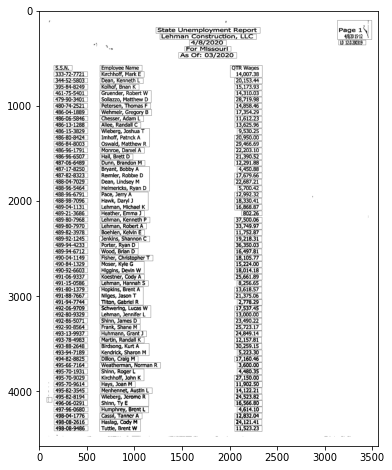

0                                                  1  \
0                                         State Unemployment Report\n
   
1                                                                        
2                                                                        
3                                                                        
4                                                                        
5                 
                                   Employee Name\n
   
6                 
                               Kirchhoff, Mark E\n
   
7    344-52-5803\n
                                 Dean, Kenneth L\n
   
8    395-84-8249\n
                                 Kolhof, Brian K\n
   
9                 
         Gruender, Robert W\nSollazzo, Matthew D\n
   
10                
                                                      
11                
                              Petersen, Thomas F\n
   
12   486-04-1889\n
                              Wehmeir, Gregory B\n
   
13   486-06-5846\n
                                 Chesser, Adam L\n
   
14                
                                Allee, Randall C\n
   
15   486-15-3829\n
   Wieberg, Joshua T\nImhoff, Patrick A\nOswald,...   
16                
                                                      
17   486-84-8003\n
                                                      
18   486-96-1791\n
                                Monroe, Daniel A\n
   
19   486-96-6507\n
                                   Hall, Brett D\n
   
20                
                                 Dunn, Brandon M\n
   
21   487-17-8250\n
   Bryant, Bobby A\nReimler, Robbie D\nDean, Lin...   
22                
                                                      
23                
                                                      
24                
                                                      
25                
   Pace, Jerry A\nHawk, Daryl J\nLehman, Michael...   
26   488-98-7096\n
                                                      
27   489-04-1131\n
                                                      
28                
                                 Heather, Emma J\n
   
29                
                               Lehman, Kenneth P\n
   
30                
                                Lehman, Robert A\n
   
31                
                               Boehlen, Kelvin E\n
   
32                
                              Jenkins, Shannon C\n
   
33                
                                  Porter, Ryan D\n
   
34                
                                   Wood, Brian D\n
   
35   490-04-1149\n
                           Fisher, Christopher T\n
   
36   490-84-1329\n
                 Moser, Kyle G\nHiggins, Devin W\n
   
37                
                                                      
38   491-06-9337\n
                                Koestner, Cody A\n
   
39                
                                Lehman, Hannah S\n
   
40                
   Hopkins, Brent A\nNilges, Jason T\nTilton, Ga...   
41                
                                                      
42                
                                                      
43                
          Schwering, Lucas W\nLehman, Jennifer L\n
   
44                
                                                      
45                
                                  Shinn, James D\n
   
46   492-90-8564\n
                                  Frank, Shane M\n
   
47                
                                Huhmann, Grant J\n
   
48                
                               Martin, Randall K\n
   
49                
            Birdsong, Kurt A\nKendrick, Sharon M\n
   
50   493-94-7189\n
                                                      
51                
                                 Dillon, Craig M\n
   
52   495-66-7164\n
                            Weatherman, Norman R\n
   
53   495-70-1931\n
   

In [21]:
import cv2
import numpy as np 
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
import statistics
from PIL import Image

plt.rcParams['figure.figsize'] = [15, 8]

img = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04162020/0347682000.jpeg',0)
img.shape



#imgplot = plt.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])
img123 = img1.copy()

(thresh, th3) = cv2.threshold(img1, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

th3 = 255-th3

#imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

if(th3.shape[0]<1000):
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1]])
    
else:
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
    
img_temp1 = cv2.erode(th3, ver, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)


#imgplot = plt.imshow(cv2.resize(verticle_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()


# to detect horizontal lines of table borders
img_hor = cv2.erode(th3, hor, iterations=3)
hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)


#imgplot = plt.imshow(cv2.resize(hor_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = 255-hor_ver

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp = cv2.subtract(th3,hor_ver)

#imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp = 255-temp


#imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

tt = cv2.bitwise_xor(img1,temp)

#imgplot = plt.imshow(cv2.resize(tt, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

iii = cv2.bitwise_not(tt)


#imgplot = plt.imshow(cv2.resize(iii, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

tt1=iii.copy()


#imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

#kernel initialization
ver1 = np.array([[1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1]])

hor1 = np.array([[1,1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1,1]])

temp1 = cv2.erode(tt1, ver1, iterations=1)
verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=1)

#imgplot = plt.imshow(cv2.resize(verticle_lines_img1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp12 = cv2.erode(tt1, hor1, iterations=1)
hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=1)

#imgplot = plt.imshow(cv2.resize(hor_lines_img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

dim1 = (hor_ver.shape[1],hor_ver.shape[0])

dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)
resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

want = cv2.bitwise_not(resized)
#imgplot = plt.imshow(cv2.resize(want, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

if(want.shape[0]<1000):
    kernel1 = np.array([[1,1,1]])
    kernel2 = np.array([[1,1],
                        [1,1]])
    kernel3 = np.array([[1,0,1],[0,1,0],
                       [1,0,1]])
else:
    kernel1 = np.array([[1,1,1,1,1,1]])
    kernel2 = np.array([[1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1]])
    
tt1 = cv2.dilate(want,kernel1,iterations=14)
#imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])
    
heightlist.sort()

sportion = int(.5*len(heightlist))

eportion = int(0.05*len(heightlist))

#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])
    
box =[]
imag = iii.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.7*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image
    

imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()
#cv2.imwrite('imagegen.jpg',image)

main=[]
j=0
l=[]
for i in range(len(box)):    
    if(i==0):
        l.append(box[i])
        last=box[i]
    else:
        if(box[i][1]<=last[1]+medianheight/2):
            l.append(box[i])
            last=box[i]
            if(i==len(box)-1):
                main.append(l)
        else:
#             print(l)            
            main.append(l)
            l=[]
            last = box[i]
            l.append(box[i])
            
#calculating maximum number of box in a particular row
maxsize=0
for i in range(len(main)):
    l=len(main[i])
    if(maxsize<=l):
        maxsize=l
        
ylist=[]
for i in range(len(boundingBoxes)):
    ylist.append(boundingBoxes[i][0])
    
ymax = max(ylist)
ymin = min(ylist)

ymaxwidth=0
for i in range(len(boundingBoxes)):
    if(boundingBoxes[i][0]==ymax):
        ymaxwidth=boundingBoxes[i][2]
        
TotWidth = ymax+ymaxwidth-ymin

width = []
widthsum=0
for i in range(len(main)):
    for j in range(len(main[i])):
        widthsum = main[i][j][2]+widthsum
    
#     print(" Row ",i,"total width",widthsum)
    width.append(widthsum)
    widthsum=0
    
main1=[]
flag=0
for i in range(len(main)):
    if(i==0):
        if(width[i]>=(.8*TotWidth) and len(main[i])==1 or width[i]>=(.8*TotWidth) and width[i+1]>=(.8*TotWidth) or len(main[i])==1):
            flag = 1
    else:
        if(len(main[i])==1 and width[i-1]>=.8*TotWidth):
            flag=1
           
        elif(width[i]>=(.8*TotWidth) and len(main[i])==1):
             flag=1
             
        elif(len(main[i-1])==1 and len(main[i])==1 and (width[i]>=(.7*TotWidth) or width[i-1]>=(.8*TotWidth))):
            flag=1
    
        
    if(flag==1):
        pass
    else:
        main1.append(main[i])
    
    flag=0
    
maxsize1=0
for i in range(len(main1)):
    l=len(main1[i])
    if(maxsize1<=l):
        maxsize1=l
    
midpoint=[]
for i in range(len(main1)):
    if(len(main1[i])==maxsize1):
#         print(main1[i])
        for j in range(maxsize1):
            midpoint.append(int(main1[i][j][0]+main1[i][j][2]/2))
        break
        
midpoint=np.array(midpoint)
midpoint.sort()

final = [[]*maxsize1]*len(main1)

for i in range(len(main1)):
    for j in range(len(main1[i])):
        min_idx = j        
        for k in range(j+1,len(main1[i])):
            if(main1[i][min_idx][0]>main1[i][k][0]):
                min_idx = k
        
        main1[i][j], main1[i][min_idx] = main1[i][min_idx],main1[i][j]
        
finallist = []
for i in range(len(main1)):
    lis=[ [] for k in range(maxsize1)]
    for j in range(len(main1[i])):
#         diff=np.zeros[maxsize]
        diff = abs(midpoint-(main1[i][j][0]+main1[i][j][2]/4))
        minvalue = min(diff)
        ind = list(diff).index(minvalue)
#         print(minvalue)
        lis[ind].append(main1[i][j])
#     print('----------------------------------------------')
    finallist.append(lis)
    
todump=[]
for i in range(len(finallist)):
    for j in range(len(finallist[i])):
        to_out=''
        if(len(finallist[i][j])==0):
            #print('-')
            todump.append(' ')
        
        else:
            for k in range(len(finallist[i][j])):                
                y,x,w,h = finallist[i][j][k][0],finallist[i][j][k][1],finallist[i][j][k][2],finallist[i][j][k][3]

                roi = iii[x:x+h, y+2:y+w]
                roi1= cv2.copyMakeBorder(roi,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255])
                img = cv2.resize(roi1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                kernel = np.ones((2, 1), np.uint8)
                img = cv2.dilate(img, kernel, iterations=1)
                img = cv2.erode(img, kernel, iterations=2)
                img = cv2.dilate(img, kernel, iterations=1)
                
                

                out = pytesseract.image_to_string(img)
                if(len(out)==0):
                    out = pytesseract.image_to_string(img,config='-psm 10')
                
                to_out = to_out +" "+out
                
            #print(to_out)
                
            todump.append(to_out)
#             cv2.imshow('image',img)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()
    

            
            
           
    #print("--------------------------------------------------")
    
npdump = np.array(todump)

dataframe = pd.DataFrame(npdump.reshape(len(main1),maxsize1))

dataframe


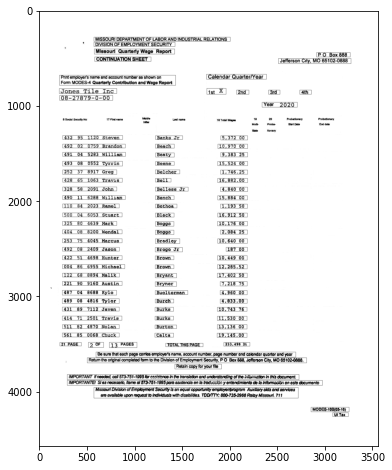

0  \
0                  DIVISION OF EMPLOYMENT SECURITY\n
   
1                   Missouri Quarterly Wage Report\n
   
2                                                       
3                               CONTINUATION SHEET\n
   
4    Pnnt employer's name and account number as sh...   
5                                   Jones Tile Inc\n
   
6                                    08-27879-0-00\n
   
7                                                       
8                               432 95 1120 Steven\n
   
9                              492 02 0759 Brandon\n
   
10                             491 04 5283 William\n
   
11                              493 08 0552 Tyrrin\n
   
12                                252 37 8917 Greg\n
   
13                              428 65 1063 Travis\n
   
14                                328 58 2091 John\n
   
15                             490 11 6288 William\n
   
16                               110 84 2023 Ramel\n
   
17                              500 04 6053 Stuart\n
   
18                                325 80 4639 Mark\n
   
19                              404 08 8200 Wendal\n
   
20                              253 75 4045 Marcus\n
   
21                               492 08 2409 Jason\n
   
22                              422 51 4698 Hunter\n
   
23                             004 86 6955 Michael\n
   
24                               122 68 8894 Malik\n
   
25                              221 90 9160 Austin\n
   
26                                487 04 8688 Kylo\n
   
27                               489 08 4816 Tylor\n
   
28                               431 89 7112 Javen\n
   
29                              414 71 2501 Travis\n
   
30                               511 82 4870 Nolan\n
   
31                              S561 85 0068 Chuck\n
   
32                     21 PAGE\n
 2 OF\n
 13 PAGES\n
   
33   Be sure that each page caries employer's name...   
34                                                      
35                                                      

                                1               2              3  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4        Calendar Quarter/Year\n
                                  
5                        1st X\n
          2nd\n
         3rd\n
   
6                                                                  
7                                                   Year 2020\n
   
8         Banks Jr\n
 5,372 00\n
                                  
9           Beach\n
 10,970 00\n
                                  
10           Beaty\n
 9,383 25\n
                                  
11          Beene\n
 15,524 00\n
                                  
12         Belcher\n
 1,746.25\n
                                  
13           Bell\n
 16,882.00\n
                                  
14      Belless Jr\n
 4,840 00\n
                                  
15          Bench\n
 15,884 00\n
                                  
16          Bothoa\n
 1,193 50\n
                                  
17          Black\n
 16,912 50\n
                                  
18          Bogga\n
 10,176 00\n
                                  
19          Boggoa\n
 2,084 25\n
                                  
20        Bradloy\n
 10,640 00\n
                                  
21                    Brago Jr\n
       187 00\n
                  
22          Brown\n
 10,449 00\n
                                  
23          Brown\n
 12,285.52\n
                                  
24         Bryant\n
 17,402 50\n
                                  
25          Bryner\n
 7,218 75\n
                                  
26      Bucltorman\n
 4,960 00\n
                                  
27           Bureh\n
 4,833.00\n
     

In [17]:
import cv2
import numpy as np 
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
import statistics
from PIL import Image

plt.rcParams['figure.figsize'] = [15, 8]

img = cv2.imread('/home/vimalkumar.s/Documents/file samples/tt/sample.jpeg',0)
img.shape



#imgplot = plt.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])
img123 = img1.copy()

(thresh, th3) = cv2.threshold(img1, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

th3 = 255-th3

#imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

if(th3.shape[0]<1000):
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1]])
    
else:
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
    
img_temp1 = cv2.erode(th3, ver, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)


#imgplot = plt.imshow(cv2.resize(verticle_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()


# to detect horizontal lines of table borders
img_hor = cv2.erode(th3, hor, iterations=3)
hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)


#imgplot = plt.imshow(cv2.resize(hor_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = 255-hor_ver

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp = cv2.subtract(th3,hor_ver)

#imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp = 255-temp


#imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

tt = cv2.bitwise_xor(img1,temp)

#imgplot = plt.imshow(cv2.resize(tt, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

iii = cv2.bitwise_not(tt)


#imgplot = plt.imshow(cv2.resize(iii, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

tt1=iii.copy()


#imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

#kernel initialization
ver1 = np.array([[1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1]])

hor1 = np.array([[1,1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1,1]])

temp1 = cv2.erode(tt1, ver1, iterations=1)
verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=1)

#imgplot = plt.imshow(cv2.resize(verticle_lines_img1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp12 = cv2.erode(tt1, hor1, iterations=1)
hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=1)

#imgplot = plt.imshow(cv2.resize(hor_lines_img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

dim1 = (hor_ver.shape[1],hor_ver.shape[0])

dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)
resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

want = cv2.bitwise_not(resized)
#imgplot = plt.imshow(cv2.resize(want, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

if(want.shape[0]<1000):
    kernel1 = np.array([[1,1,1]])
    kernel2 = np.array([[1,1],
                        [1,1]])
    kernel3 = np.array([[1,0,1],[0,1,0],
                       [1,0,1]])
else:
    kernel1 = np.array([[1,1,1,1,1,1]])
    kernel2 = np.array([[1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1]])
    
tt1 = cv2.dilate(want,kernel1,iterations=14)
#imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])
    
heightlist.sort()

sportion = int(.5*len(heightlist))

eportion = int(0.05*len(heightlist))

#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])
    
box =[]
imag = iii.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.7*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image
    

imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()
#cv2.imwrite('imagegen.jpg',image)

main=[]
j=0
l=[]
for i in range(len(box)):    
    if(i==0):
        l.append(box[i])
        last=box[i]
    else:
        if(box[i][1]<=last[1]+medianheight/2):
            l.append(box[i])
            last=box[i]
            if(i==len(box)-1):
                main.append(l)
        else:
#             print(l)            
            main.append(l)
            l=[]
            last = box[i]
            l.append(box[i])
            
#calculating maximum number of box in a particular row
maxsize=0
for i in range(len(main)):
    l=len(main[i])
    if(maxsize<=l):
        maxsize=l
        
ylist=[]
for i in range(len(boundingBoxes)):
    ylist.append(boundingBoxes[i][0])
    
ymax = max(ylist)
ymin = min(ylist)

ymaxwidth=0
for i in range(len(boundingBoxes)):
    if(boundingBoxes[i][0]==ymax):
        ymaxwidth=boundingBoxes[i][2]
        
TotWidth = ymax+ymaxwidth-ymin

width = []
widthsum=0
for i in range(len(main)):
    for j in range(len(main[i])):
        widthsum = main[i][j][2]+widthsum
    
#     print(" Row ",i,"total width",widthsum)
    width.append(widthsum)
    widthsum=0
    
main1=[]
flag=0
for i in range(len(main)):
    if(i==0):
        if(width[i]>=(.8*TotWidth) and len(main[i])==1 or width[i]>=(.8*TotWidth) and width[i+1]>=(.8*TotWidth) or len(main[i])==1):
            flag = 1
    else:
        if(len(main[i])==1 and width[i-1]>=.8*TotWidth):
            flag=1
           
        elif(width[i]>=(.8*TotWidth) and len(main[i])==1):
             flag=1
             
        elif(len(main[i-1])==1 and len(main[i])==1 and (width[i]>=(.7*TotWidth) or width[i-1]>=(.8*TotWidth))):
            flag=1
    
        
    if(flag==1):
        pass
    else:
        main1.append(main[i])
    
    flag=0
    
maxsize1=0
for i in range(len(main1)):
    l=len(main1[i])
    if(maxsize1<=l):
        maxsize1=l
    
midpoint=[]
for i in range(len(main1)):
    if(len(main1[i])==maxsize1):
#         print(main1[i])
        for j in range(maxsize1):
            midpoint.append(int(main1[i][j][0]+main1[i][j][2]/2))
        break
        
midpoint=np.array(midpoint)
midpoint.sort()

final = [[]*maxsize1]*len(main1)

for i in range(len(main1)):
    for j in range(len(main1[i])):
        min_idx = j        
        for k in range(j+1,len(main1[i])):
            if(main1[i][min_idx][0]>main1[i][k][0]):
                min_idx = k
        
        main1[i][j], main1[i][min_idx] = main1[i][min_idx],main1[i][j]
        
finallist = []
for i in range(len(main1)):
    lis=[ [] for k in range(maxsize1)]
    for j in range(len(main1[i])):
#         diff=np.zeros[maxsize]
        diff = abs(midpoint-(main1[i][j][0]+main1[i][j][2]/4))
        minvalue = min(diff)
        ind = list(diff).index(minvalue)
#         print(minvalue)
        lis[ind].append(main1[i][j])
#     print('----------------------------------------------')
    finallist.append(lis)
    
todump=[]
for i in range(len(finallist)):
    for j in range(len(finallist[i])):
        to_out=''
        if(len(finallist[i][j])==0):
            #print('-')
            todump.append(' ')
        
        else:
            for k in range(len(finallist[i][j])):                
                y,x,w,h = finallist[i][j][k][0],finallist[i][j][k][1],finallist[i][j][k][2],finallist[i][j][k][3]

                roi = iii[x:x+h, y+2:y+w]
                roi1= cv2.copyMakeBorder(roi,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255])
                img = cv2.resize(roi1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                kernel = np.ones((2, 1), np.uint8)
                img = cv2.dilate(img, kernel, iterations=1)
                img = cv2.erode(img, kernel, iterations=2)
                img = cv2.dilate(img, kernel, iterations=1)
                
                

                out = pytesseract.image_to_string(img)
                if(len(out)==0):
                    out = pytesseract.image_to_string(img,config='-psm 10')
                
                to_out = to_out +" "+out
                
            #print(to_out)
                
            todump.append(to_out)
#             cv2.imshow('image',img)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()
    

            
            
           
    #print("--------------------------------------------------")
    
npdump = np.array(todump)

dataframe = pd.DataFrame(npdump.reshape(len(main1),maxsize1))

dataframe


In [1]:
    
def table_extraction(file_name):   
    import cv2
    import numpy as np 
    import pandas as pd
    import pytesseract
    import matplotlib.pyplot as plt
    import statistics
    from PIL import Image

    plt.rcParams['figure.figsize'] = [15, 15]

    img = cv2.imread(file_name,0)
    img.shape



    #imgplot = plt.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])
    img123 = img1.copy()

    (thresh, th3) = cv2.threshold(img1, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

    #imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    th3 = 255-th3

    #imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    if(th3.shape[0]<1000):
        ver = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1]])
        hor = np.array([[1,1,1,1,1,1]])

    else:
        ver = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1]])
        hor = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

    img_temp1 = cv2.erode(th3, ver, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)


    #imgplot = plt.imshow(cv2.resize(verticle_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()


    # to detect horizontal lines of table borders
    img_hor = cv2.erode(th3, hor, iterations=3)
    hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)


    #imgplot = plt.imshow(cv2.resize(hor_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

    #imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    hor_ver = 255-hor_ver

    #imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    temp = cv2.subtract(th3,hor_ver)

    #imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    temp = 255-temp


    #imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    tt = cv2.bitwise_xor(img1,temp)

    #imgplot = plt.imshow(cv2.resize(tt, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    iii = cv2.bitwise_not(tt)


    #imgplot = plt.imshow(cv2.resize(iii, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    tt1=iii.copy()


    #imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    #kernel initialization
    ver1 = np.array([[1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1]])

    hor1 = np.array([[1,1,1,1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1,1,1,1]])

    temp1 = cv2.erode(tt1, ver1, iterations=1)
    verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=1)

    #imgplot = plt.imshow(cv2.resize(verticle_lines_img1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    temp12 = cv2.erode(tt1, hor1, iterations=1)
    hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=1)

    #imgplot = plt.imshow(cv2.resize(hor_lines_img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)

    #imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    dim1 = (hor_ver.shape[1],hor_ver.shape[0])

    dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)
    resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

    want = cv2.bitwise_not(resized)
    #imgplot = plt.imshow(cv2.resize(want, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    if(want.shape[0]<1000):
        kernel1 = np.array([[1,1,1]])
        kernel2 = np.array([[1,1],
                            [1,1]])
        kernel3 = np.array([[1,0,1],[0,1,0],
                           [1,0,1]])
    else:
        kernel1 = np.array([[1,1,1,1,1,1]])
        kernel2 = np.array([[1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1]])

    tt1 = cv2.dilate(want,kernel1,iterations=14)
    #imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

    contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    def sort_contours(cnts, method="left-to-right"):
        # initialize the reverse flag and sort index
        reverse = False
        i = 0

        # handle if we need to sort in reverse
        if method == "right-to-left" or method == "bottom-to-top":
            reverse = True

        # handle if we are sorting against the y-coordinate rather than
        # the x-coordinate of the bounding box
        if method == "top-to-bottom" or method == "bottom-to-top":
            i = 1

        # construct the list of bounding boxes and sort them from top to
        # bottom
        boundingBoxes = [cv2.boundingRect(c) for c in cnts]
        (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
            key=lambda b:b[1][i], reverse=reverse))

        # return the list of sorted contours and bounding boxes
        return (cnts, boundingBoxes)

    (cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

    heightlist=[]
    for i in range(len(boundingBoxes)):
        heightlist.append(boundingBoxes[i][3])

    heightlist.sort()

    sportion = int(.5*len(heightlist))

    eportion = int(0.05*len(heightlist))

    #taking 50% to 95% values of heights and calculate their mean 
    #this will neglect small bounding box which are basically noise 
    try:
        medianheight = statistics.mean(heightlist[-sportion:-eportion])
    except:
        medianheight = statistics.mean(heightlist[-sportion:-2])

    box =[]
    imag = iii.copy()
    for i in range(len(cnts)):    
        cnt = cnts[i]
        x,y,w,h = cv2.boundingRect(cnt)
        if(h>=.5*medianheight and w/h > 0.98):
            image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
            box.append([x,y,w,h])
        # to show image


    imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    plt.show()
    #cv2.imwrite('imagegen.jpg',image)

    main=[]
    j=0
    l=[]
    for i in range(len(box)):    
        if(i==0):
            l.append(box[i])
            last=box[i]
        else:
            if(box[i][1]<=last[1]+medianheight/2):
                l.append(box[i])
                last=box[i]
                if(i==len(box)-1):
                    main.append(l)
            else:
    #             print(l)            
                main.append(l)
                l=[]
                last = box[i]
                l.append(box[i])

    #calculating maximum number of box in a particular row
    maxsize=0
    for i in range(len(main)):
        l=len(main[i])
        if(maxsize<=l):
            maxsize=l

    ylist=[]
    for i in range(len(boundingBoxes)):
        ylist.append(boundingBoxes[i][0])

    ymax = max(ylist)
    ymin = min(ylist)

    ymaxwidth=0
    for i in range(len(boundingBoxes)):
        if(boundingBoxes[i][0]==ymax):
            ymaxwidth=boundingBoxes[i][2]

    TotWidth = ymax+ymaxwidth-ymin

    width = []
    widthsum=0
    for i in range(len(main)):
        for j in range(len(main[i])):
            widthsum = main[i][j][2]+widthsum

    #     print(" Row ",i,"total width",widthsum)
        width.append(widthsum)
        widthsum=0

    main1=[]
    flag=0
    for i in range(len(main)):
        if(i==0):
            if(width[i]>=(.8*TotWidth) and len(main[i])==1 or width[i]>=(.8*TotWidth) and width[i+1]>=(.8*TotWidth) or len(main[i])==1):
                flag = 1
        else:
            if(len(main[i])==1 and width[i-1]>=.8*TotWidth):
                flag=1

            elif(width[i]>=(.8*TotWidth) and len(main[i])==1):
                 flag=1

            elif(len(main[i-1])==1 and len(main[i])==1 and (width[i]>=(.7*TotWidth) or width[i-1]>=(.8*TotWidth))):
                flag=1


        if(flag==1):
            pass
        else:
            main1.append(main[i])

        flag=0

    maxsize1=0
    for i in range(len(main1)):
        l=len(main1[i])
        if(maxsize1<=l):
            maxsize1=l

    midpoint=[]
    for i in range(len(main1)):
        if(len(main1[i])==maxsize1):
    #         print(main1[i])
            for j in range(maxsize1):
                midpoint.append(int(main1[i][j][0]+main1[i][j][2]/2))
            break

    midpoint=np.array(midpoint)
    midpoint.sort()

    final = [[]*maxsize1]*len(main1)

    for i in range(len(main1)):
        for j in range(len(main1[i])):
            min_idx = j        
            for k in range(j+1,len(main1[i])):
                if(main1[i][min_idx][0]>main1[i][k][0]):
                    min_idx = k

            main1[i][j], main1[i][min_idx] = main1[i][min_idx],main1[i][j]

    finallist = []
    for i in range(len(main1)):
        lis=[ [] for k in range(maxsize1)]
        for j in range(len(main1[i])):
    #         diff=np.zeros[maxsize]
            diff = abs(midpoint-(main1[i][j][0]+main1[i][j][2]/4))
            minvalue = min(diff)
            ind = list(diff).index(minvalue)
    #         print(minvalue)
            lis[ind].append(main1[i][j])
    #     print('----------------------------------------------')
        finallist.append(lis)

    todump=[]
    for i in range(len(finallist)):
        for j in range(len(finallist[i])):
            to_out=''
            if(len(finallist[i][j])==0):
                #print('-')
                todump.append(' ')

            else:
                for k in range(len(finallist[i][j])):                
                    y,x,w,h = finallist[i][j][k][0],finallist[i][j][k][1],finallist[i][j][k][2],finallist[i][j][k][3]

                    roi = iii[x:x+h, y+2:y+w]
                    roi1= cv2.copyMakeBorder(roi,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255])
                    img = cv2.resize(roi1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                    kernel = np.ones((2, 1), np.uint8)
                    img = cv2.dilate(img, kernel, iterations=1)
                    img = cv2.erode(img, kernel, iterations=2)
                    img = cv2.dilate(img, kernel, iterations=1)



                    out = pytesseract.image_to_string(img)
                    if(len(out)==0):
                        out = pytesseract.image_to_string(img,config='-psm 6')

                    to_out = to_out +" "+out

                #print(to_out)

                todump.append(to_out)
    #             cv2.imshow('image',img)
    #             cv2.waitKey(0)
    #             cv2.destroyAllWindows()





        #print("--------------------------------------------------")

    npdump = np.array(todump)

    dataframe = pd.DataFrame(npdump.reshape(len(main1),maxsize1))

    display(dataframe)
    

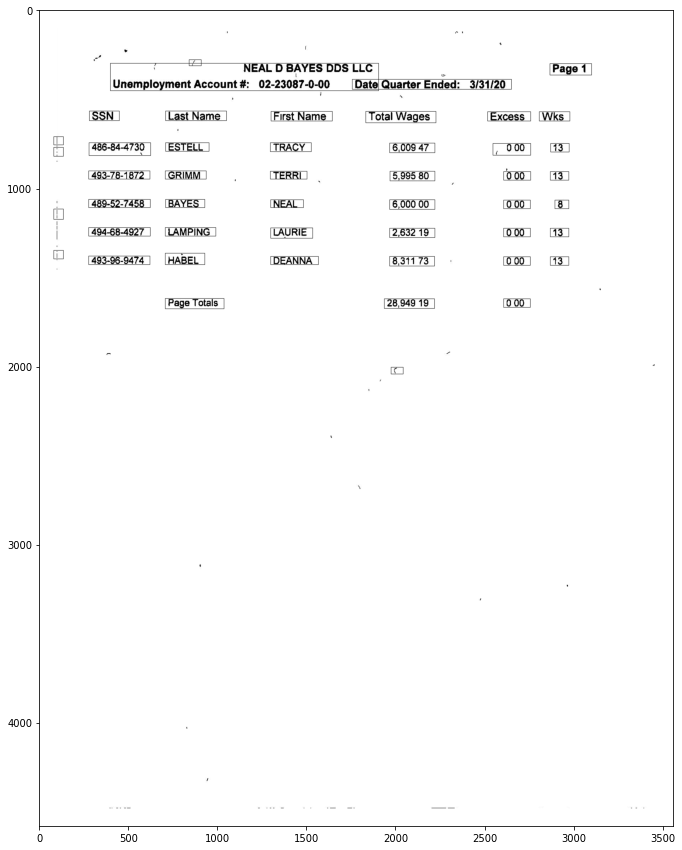

0                1                                                  2  \
0                         NEAL D BAYES DDS LLC\nonamplorment Account #:...   
1                                                                            
2                SSN\n
                                       Last Name\n
   
3    
                                                                       
4    
   486-84-4730\n
                                          ESTELL\n
   
5        493-78-1872\n
                                           GRIMM\n
   
6        489-52-7458\n
                                           BAYES\n
   
7    
                                                                       
8        494-68-4927\n
                                         LAMPING\n
   
9    
   493-96-9474\n
                                           HABEL\n
   
10                                                          Page Totals\n
   

                 3                                4           5           6  
0                                                                 Page 1\n
  
1                    Date Quarter Ended: 3/31/20\n
                          
2    First Name\n
                   Total Wages\n
   Excess\n
      Wks\n
  
3                                                                            
4         TRACY\n
                      6,009 47\n
     0 00\n
       43\n
  
5                
                      5,995 80\n
      000\n
       13\n
  
6          NEAL\n
                      6,000 00\n
     0 00\n
           
  
7                                                                            
8        LAURIE\n
                      2,632 19\n
      000\n
       13\n
  
9        DEANNA\n
                      8,311 73\n
      000\n
       13\n
  
10                                     28,949 19\n
      000\n

In [5]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0223087000.jpeg'
table_extraction(file_name)

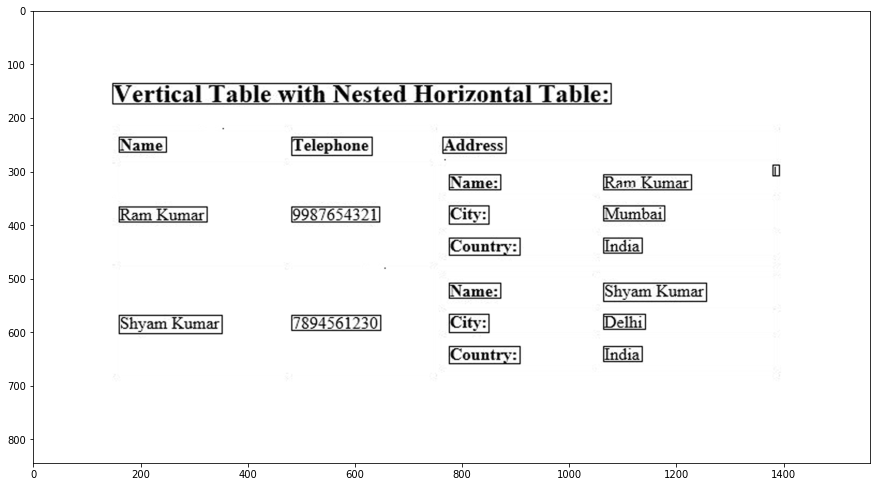

0               1             2                3
0                                
                               
1          Name\n
    Telephone\n
    Address\n
                 
2                                                               

3                                       Name:\n
     Ram Kumar\n

4     Ram Kumar\n
   9987654321\n
      City:\n
        Mumbai\n

5                                    Country:\n
         India\n

6                                       Name:\n
   Shyam Kumar\n

7   Shyam Kumar\n
   7894561230\n
      City:\n
         Delhi\n

8                                    Country:\n
         India\n

In [10]:
file_name = '/home/vimalkumar.s/Downloads/image2.jpg'
table_extraction(file_name)

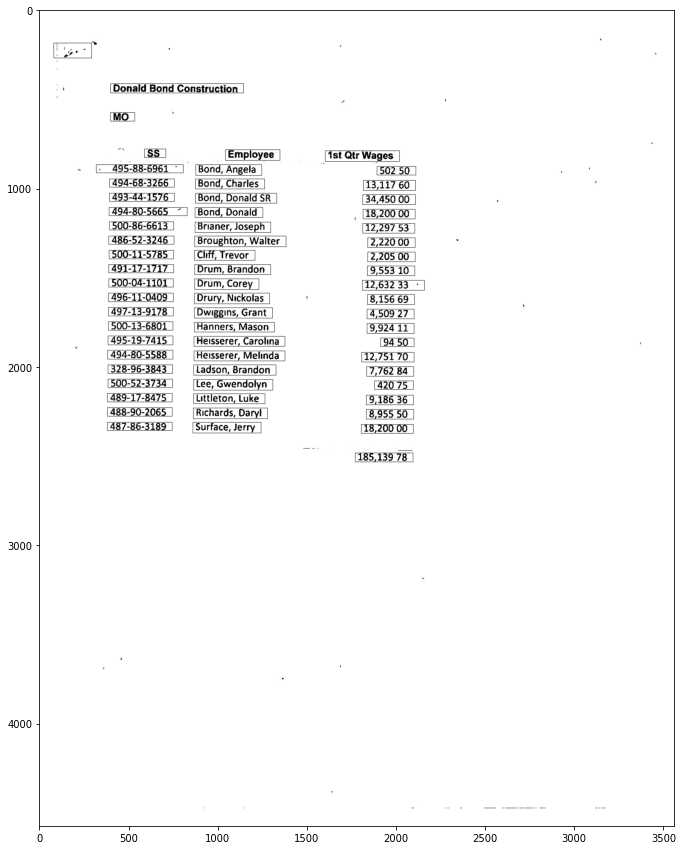

0                        1                  2
0    Donald Bond Construction\n
                                            
1                          MO\n
                                            
2                          Ss\n
              Employee\n
   ist Qtr Wages\n

3              495-88-6961 ~-\n
          Bond, Angela\n
          502 50\n

4                 494-68-3266\n
         Bond, Charles\n
       13,117 60\n

5                 493-44-1576\n
       Bond, Donald SR\n
       34,450 00\n

6              494-800-5665 ~\n
          Bond, Donald\n
       18,200 00\n

7                 500-86-6613\n
       Brianer, Joseph\n
       12,297 53\n

8                 486-52-3246\n
     Broughton, Walter\n
        2,220 00\n

9                 500-11-5785\n
         Cliff, Trevor\n
        2,205 00\n

10                491-17-1717\n
         Drum, Brandon\n
        9,553 10\n

11                500-04-1101\n
           Drum, Corey\n
     12,632 33 >\n

12                496-11-0409\n
       Drury, Nickolas\n
        8,156 69\n

13               497-113-9178\n
       Dwiggins, Grant\n
        4,509 27\n

14                500-13-6801\n
        Hanners, Mason\n
        9,924 11\n

15                495-19-7415\n
   Heisserer, Carolina\n
           94 50\n

16                494-80-5588\n
    Heisserer, Melinda\n
       12,751 70\n

17                328-96-3843\n
       Ladson, Brandon\n
        7,762 84\n

18                500-52-3734\n
        Lee, Gwendolyn\n
          420 75\n

19                489-17-8475\n
       Littleton, Luke\n
        9,186 36\n

20                488-90-2065\n
       Richards, Daryl\n
        8,955 50\n

21                487-86-3189\n
        Surface, Jerry\n
       18,200 00\n

In [11]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0223363000.jpeg'
table_extraction(file_name)

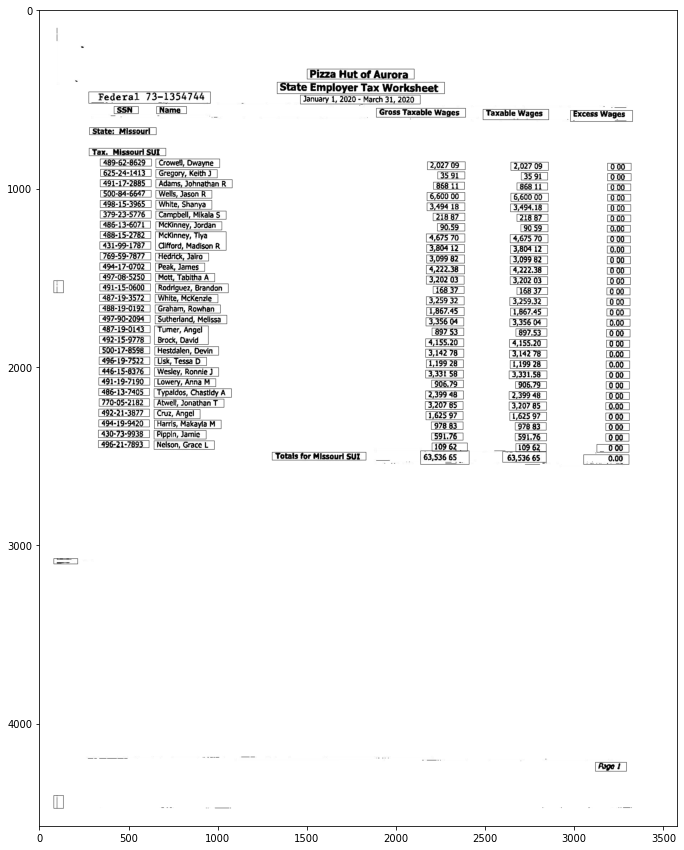

0                               1  2   \
0                                           
1               _Federal 73-1354744\n
      
2                                    
      
3                   State: Missourl\n
      
4                 Tax. Missouri SUI\n
      
5                       489-62-8629\n
      
6                       625-24-1413\n
      
7                       491-17-2885\n
      
8                       500-84-6647\n
      
9                       498-15-3965\n
      
10                      379-23-5776\n
      
11                      486-13-6071\n
      
12                      488-15-2782\n
      
13                      431-99-1787\n
      
14                      769-59-7877\n
      
15                      494-17-0702\n
      
16   
   497-08-5250\n
 491-15-0600\n
      
17                      487-19-3572\n
      
18                      488-19-0192\n
      
19                     497-900-2094\n
      
20                      487-19-0143\n
      
21                      492-1§-9778\n
      
22                      500-17-8598\n
      
23                      496-19-7522\n
      
24                      446-15-8376\n
      
25                      491-19-7190\n
      
26                      486-13-7405\n
      
27                      770-05-2182\n
      
28                      992-21-3877\n
      
29                      494-19-9420\n
      
30                      430-73-9938\n
      
31                      496-21-7893\n
      
32                                          
33   
                                      
34                                          

                                           3   \
0                                               
1                                               
2                                           
   
3                                               
4                                               
5                          Crowell, Owayne\n
   
6                         Gregory, Keith )\n
   
7                       Adams, Johnathan R\n
   
8                           Wells, Jason R\n
   
9                            White, Shanya\n
   
10                      Campbell, Mikala $\n
   
11                        Mckinney, Jordan\n
   
12     McKinney, Tiya\nCilfford, Madison &\n
   
13                                              
14                          Hedrick, Jairo\n
   
15                             Peak, James\n
   
16   Mott, Tabitha A\n
 Rodriguez, Brandon\n
   
17                         White, McKenzle\n
   
18                          Graham, Rowhan\n
   
19                     Sutherland, Melissa\n
   
20              Tumer, Angel\nBrock, David\n
   
21                                              
22                        Hestdalen, Devin\n
   
23                           Lisk, Tessa D\n
   
24                        Wesley, Ronnie J\n
   
25                          Lowery, Anna M\n
   
26                    Typaldos, Chastldy A\n
   
27                      Atwell, Jonathan T\n
   
28                             Cruz, Angel\n
   
29                       Harrls, Makayla M\n
   
30                           Pippin, Jamie\n
   
31                         Nelson, Grace L\n
   
32                                              
33                                              
34                                              

                                  4                                     5  6   \
0    State Employer Tax Worksheet\n
                                            
1                                      January 1, 2020 - March 31, 2020\n
      
2                                                   Gross Taxable Wages\n
      
3                                                                               
4                                                                               
5                                                              2,027 09\n
      
6                                                  

In [15]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0239379000.jpeg'
table_extraction(file_name)

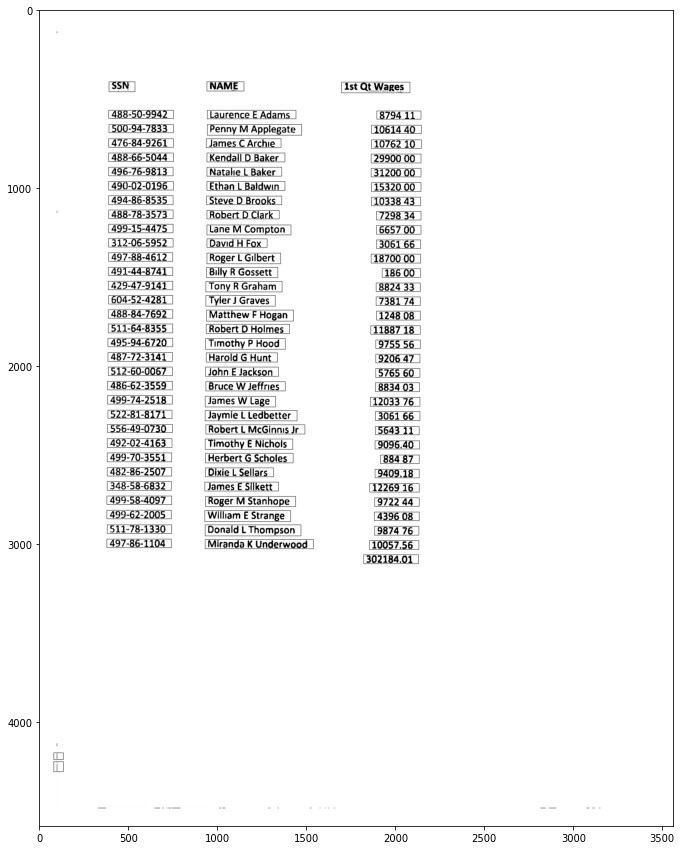

0                         1                 2
0             SSN\n
                   NAME\n
   1st Qt Wages\n

1     488-50-9942\n
       Laurence E Adams\n
        8794 11\n

2     500-94-7833\n
      Penny M Applegate\n
       10614 40\n

3    476-834-9261\n
         James C Archie\n
       10762 10\n

4     488-66-5044\n
        Kendall D Baker\n
       29900 00\n

5     496-76-9813\n
        Natalie L Baker\n
       31200 00\n

6     490-02-0196\n
        Ethan L Baldwin\n
       45320 00\n

7     494-86-8535\n
         Steve D Brooks\n
       10338 43\n

8     488-78-3573\n
         Robert D Clark\n
        7298 34\n

9     499-15-4475\n
         Lane M Compton\n
        6657 00\n

10    312-06-5952\n
            David H Fox\n
        3061 66\n

11    497-88-4612\n
        Roger L Gilbert\n
       18700 00\n

12    491-44-8741\n
        Billy R Gossett\n
         186 00\n

13    429-47-9141\n
          Tony R Graham\n
        8824 33\n

14    604-52-4281\n
         Tyler J Graves\n
        7381 74\n

15    488-84-7692\n
        Matthew F Hogan\n
                 

16    511-64-8355\n
        Robert D Holmes\n
       11887 18\n

17    495-94-6720\n
         Timothy P Hood\n
        9755 56\n

18    487-72-3141\n
          Harold G Hunt\n
        9206 47\n

19    512-60-0067\n
         John E Jackson\n
        5765 60\n

20    486-62-3559\n
       Bruce W Jeffries\n
        8834 03\n

21    499-74-2518\n
           James W Lage\n
                 

22    522-81-8171\n
     Jaymie L Ledbetter\n
        3061 66\n

23    556-49-0730\n
   Robert L McGinnis Jr\n
        5643 11\n

24    492-02-4163\n
      Timothy E Nichols\n
        9096.40\n

25    499-70-3551\n
      Herbert G Scholes\n
         884 87\n

26    482-86-2507\n
        Dixie L Sellars\n
        9409.18\n

27    348-58-6832\n
        James E Silkett\n
       12269 16\n

28    499-58-4097\n
       Roger M Stanhope\n
        9722 44\n

29    499-62-2005\n
      William E Strange\n
        4396 08\n

30    511-78-1330\n
      Donald L Thompson\n
        9874 76\n

31    497-86-1104\n
    Miranda K Underwood\n
                 

32                                                             

33

In [17]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0633960000.jpeg'
table_extraction(file_name)

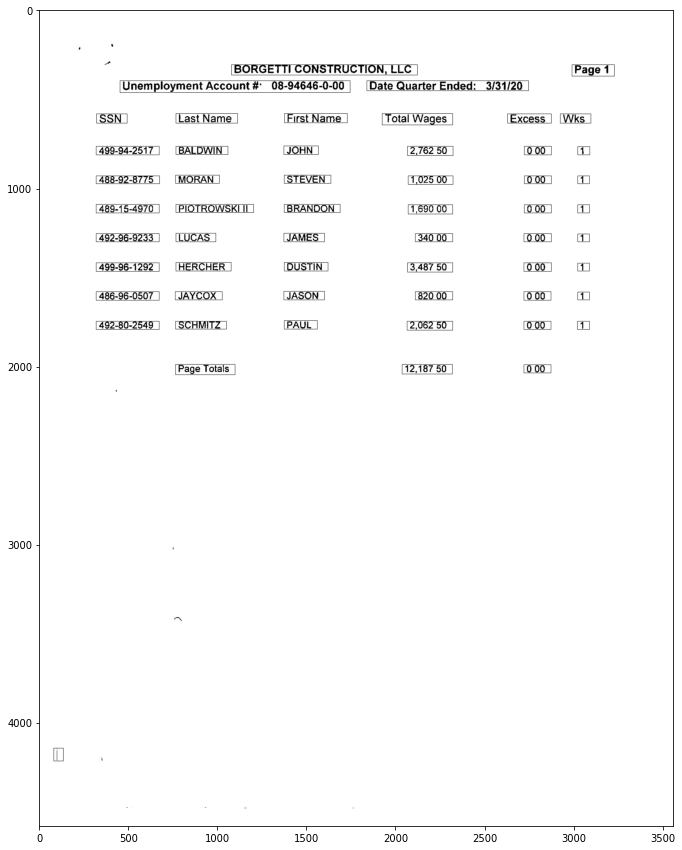

0                                         1  \
0                                                               
1                     Unemployment Account # 08-94646-0-00\n
   
2            SSN\n
                              Last Name\n
   
3    499-94-2517\n
                                BALDWIN\n
   
4    488-92-8775\n
                                  MORAN\n
   
5    489-15-4970\n
                          PIOTROWSKI II\n
   
6    492-96-9233\n
                                  LUCAS\n
   
7    499-96-1292\n
                                HERCHER\n
   
8    486-96-0507\n
                                 JAYCOX\n
   
9    492-80-2549\n
                                         
   
10                                             Page Totals\n
   

                                 2                                3  \
0    BORGETTI CONSTRUCTION, LLC\n
                                    
1                                    Date Quarter Ended: 3/31/20\n
   
2                    First Name\n
                   Total Wages\n
   
3                          JOHN\n
                      2,762 50\n
   
4                        STEVEN\n
                      1,025 00\n
   
5                       BRANDON\n
                      1,690 00\n
   
6                         JAMES\n
                        340 00\n
   
7                        DUSTIN\n
                      3,487 50\n
   
8                         JASON\n
                        820 00\n
   
9                          PAUL\n
                      2,062 50\n
   
10                                                     12,187 50\n
   

             4           5  
0                Page 1\n
  
1                           
2    Excess\n
      Wks\n
  
3       000\n
           
  
4      0 00\n
           
  
5      0 00\n
           
  
6      0 00\n
           
  
7       000\n
           
  
8      0 00\n
           
  
9       000\n
           
  
10     0 00\n

In [18]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0894646000.jpeg'
table_extraction(file_name)

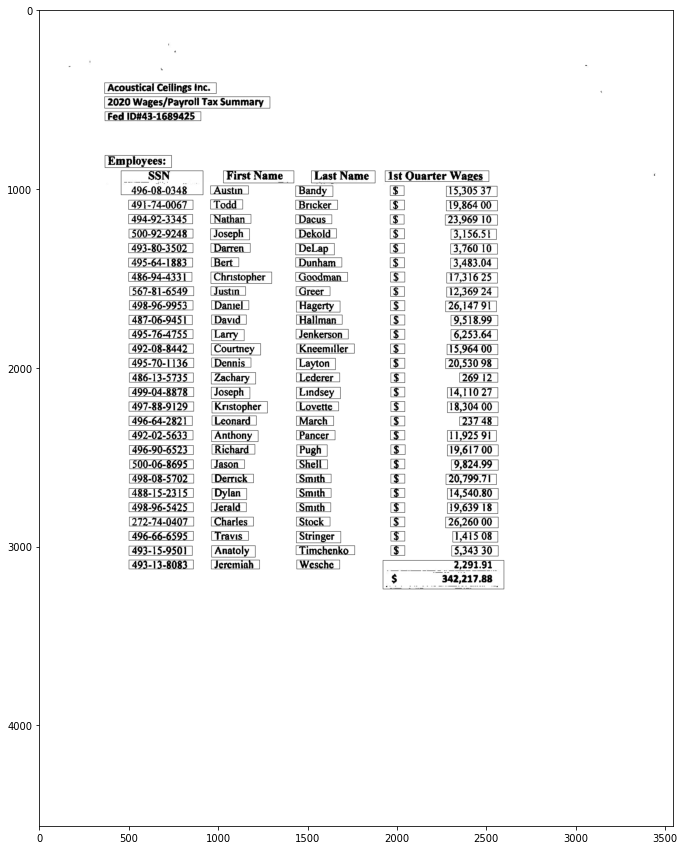

0                1               2  \
0    2020 Wages/Payroll Tax Summary\n
                                    
1                 Fed ID#43-1689425\n
                                    
2                        Employees:\n
                                    
3            soon SSN,\n496-08-0348\n
    First Name\n
    Last Name\n
   
4                                             Austin\n
        Bandy\n
   
5                      491t-74-0067\n
          Todd\n
      Bricker\n
   
6                       494-92-3345\n
        Nathan\n
        Dacus\n
   
7                                    
        Joseph\n
       Dekold\n
   
8                       493-80-3502\n
        Darren\n
        DeLap\n
   
9                       495-64-1883\n
          Bert\n
       Dunham\n
   
10                                   
   Christopher\n
      Goodman\n
   
11                                   
        Justin\n
        Greer\n
   
12                      498-96-9953\n
        Daniel\n
      Hagerty\n
   
13                      487-06-9451\n
         David\n
      Hallman\n
   
14                                   
         Larry\n
    Jenkerson\n
   
15                      492-08-8442\n
      Courtney\n
   Kneemiller\n
   
16                      495-70-1136\n
        Dennis\n
       Layton\n
   
17                      486-13-5735\n
       Zachary\n
      Lederer\n
   
18                                   
        Joseph\n
      Lindsey\n
   
19                     497-88-9 129\n
    Kristopher\n
      Lovette\n
   
20                      496-64-2821\n
       Leonard\n
        March\n
   
21                      492-02-5633\n
       Anthony\n
       Pancer\n
   
22                                   
       Richard\n
         Pugh\n
   
23                                   
         Jason\n
        Sheil\n
   
24                                   
       Derrick\n
        Smith\n
   
25                                   
         Dylan\n
        Smith\n
   
26                                   
        Jerald\n
        Smith\n
   
27                                   
       Charles\n
        Stock\n
   
28                                   
        Travis\n
     Stringer\n
   
29                      493-15-9501\n
       Anatoly\n
    Timchenko\n
   
30                                   
      Jeremiah\n
       Wesche\n
   

                                    3              4  
0                                                     
1                                                     
2                                                     
3                Ist Quarter Wages\n
                 
4                                   
   15,305 37\n
  
5                                   
   19,864 00\n
  
6                                   
   23,969 10\n
  
7                                   
     3,156.5\n
  
8                                   
    3,760 10\n
  
9                                   
    3,483.04\n
  
10                                  
   17,316 25\n
  
11                                  
   12,369 24\n
  
12                                  
   26,147 91\n
  
13                                  
    9,518.99\n
  
14                                  
    6,253.64\n
  
15                                  
   15,964 00\n
  
16                                  
   20,530 98\n
  
17                                  
      269 12\n
  
18                                  
   14,110 27\n
  
19                                  
   18,304 00\n
  
20                                  
      237 48\n
  
21                                  
   11,925 91\n
  
22                                  
   19,617 00\n
  
23                                  
    9,824.99\n
  
24                                  
   20,799.71\n
  
25                                  
   14,540.80\n
  
26                                  
   19,639 18\n
  
27                                  
   26,260 00\n
  
28                                  
    

In [19]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0933091000.jpeg'
table_extraction(file_name)

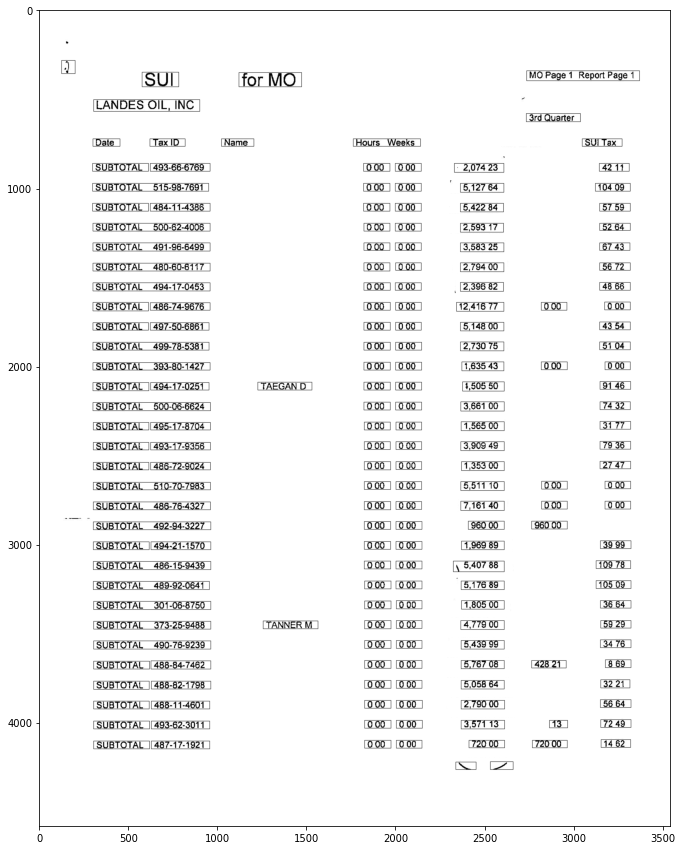

0                   1                2         3  \
0                                     
 for MO\n
                              
1          LANDES OIL, INC\n
                                                  
2                                                                              
3                     Date\n
   Tax ID\n
 Name\n
   Hours Weeks\n
             
4                           
      493-66-6769\n
           000\n
    000\n
   
5     SUBTOTAL 515-98-7691\n
                               000\n
    000\n
   
6                           
      484-11-4386\n
           000\n
    000\n
   
7     SUBTOTAL 500-62-4006\n
                               000\n
   0 00\n
   
8     SUBTOTAL 491-96-6499\n
                               000\n
    000\n
   
9     SUBTOTAL 480-60-6117\n
                               000\n
    000\n
   
10    SUBTOTAL 494-17-0453\n
                               000\n
    000\n
   
11                SUBTOTAL\n
      486-74-9676\n
           000\n
   0 00\n
   
12                          
      497-50-6861\n
           000\n
   0 00\n
   
13                          
                               000\n
   0 00\n
   
14    SUBTOTAL 393-80-1427\n
                               000\n
   0 00\n
   
15                SUBTOTAL\n
    494-17-0251\n
 
          0 00\n
    000\n
   
16    SUBTOTAL 500-06-6624\n
                              0 00\n
   0 00\n
   
17                          
      495-17-8704\n
           000\n
   0 00\n
   
18                          
      493-17-9356\n
           000\n
   0 00\n
   
19                          
      486-72-9024\n
           000\n
   0 00\n
   
20   SUBTOTAL 510-770-7983\n
                               000\n
   0 00\n
   
21                          
                               000\n
   0 00\n
   
22                          
                               000\n
   0 00\n
   
23                          
      494-21-1570\n
          0 00\n
   0 00\n
   
24    SUBTOTAL 486-15-9439\n
                               000\n
    000\n
   
25    SUBTOTAL 489-92-0641\n
                               000\n
   0 00\n
   
26    SUBTOTAL 301-06-8750\n
                               000\n
    000\n
   
27                          
                   
           000\n
   0 00\n
   
28    SUBTOTAL 490-76-9239\n
                               000\n
    000\n
   
29                          
      488-84-7462\n
           000\n
   Q 00\n
   
30                SUBTOTAL\n
                   
           000\n
   0 00\n
   
31                          
      488-11-4601\n
           000\n
   0 00\n
   
32                          
      493-62-3011\n
           000\n
   0 00\n
   
33                          
      487-17-1921\n
          0 00\n
   0 00\n
   
34                                                                             

                 4                            5            6  
0                    MO Page 1 Report Page 1\n
               
1                                                             
2                                3rd Quarter\n
               
3                                                 SU] Tax\n
  
4    ' 2,074 23\n
                                         
  
5      5,127 64\n
                                         
  
6      5,422 84\n
                                         
  
7      2,593 17\n
                                  52 64\n
  
8      3,583 25\n
                                         
  
9      2,794 00\n
                                         
  
10     2,396 82\n
                                         
  
11    12,416 77\n
                       000\n
      0 00\n
  
12     5,148 00\n
                                         
  
13     2,730 75\n
                                         
  
14     1,635 43\n
                       000\n
      0 00\n
  
15     4,505 50\n
                                         
  
16     3,661 00\n
                                         
  
17     1,565 

In [24]:
file_name = '/home/vimalkumar.s/Downloads/scribbles0104702000 .tif'
table_extraction(file_name)

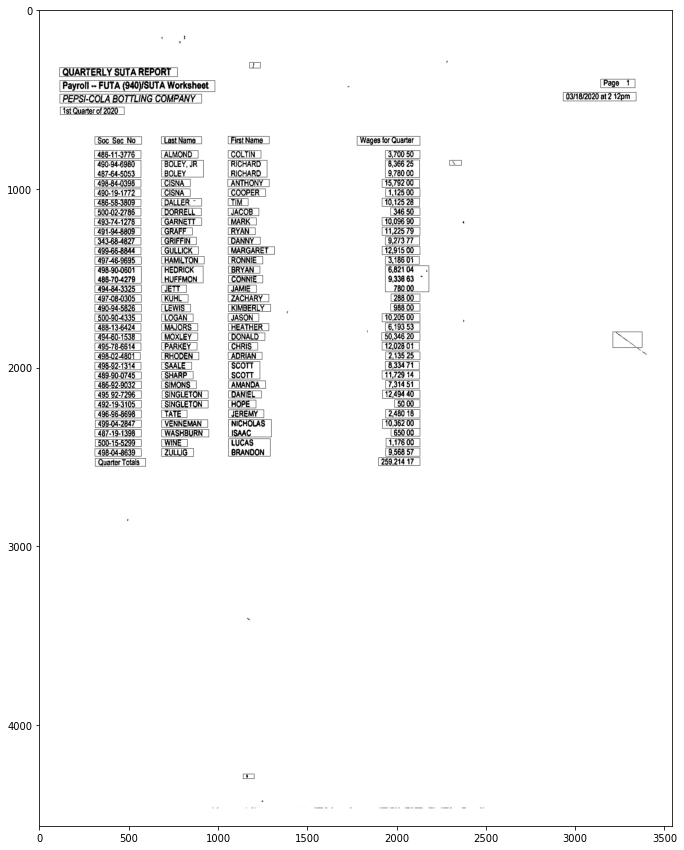

0                     1  \
0                   QUARTERLY SUTA REPORT\n
                         
1    Payroll -- FUTA (940)/SUTA Worksheet\n
                         
2             PEPSI-COLA BOTTLING COMPANY\n
                         
3                     ist Quarter of 2020\n
                         
4                              Soc Sec No\n
          Last Name\n
   
5                             486-11-3776\n
             ALMOND\n
   
6                490-94-6980\n487-64-5053\n
   BOLEY, JR\nBOLEY\n
   
7                             498-84-0398\n
              CISNA\n
   
8                             490-19-1772\n
              CISNA\n
   
9                             486-58-3809\n
           DALLER ~\n
   
10                            500-02-2786\n
            DORRELL\n
   
11                            493-74-1278\n
            GARNETT\n
   
12                            491-94-8809\n
              GRAFF\n
   
13                           343-468-4827\n
            GRIFFIN\n
   
14                           4990-66-8844\n
            GULLICK\n
   
15                            497-46-9695\n
           HAMILTON\n
   
16               498-90-0601\n486-70-4279\n
   HEDRICK\nHUFFMON\n
   
17                                                                   
18                            494.84-3325\n
               JETT\n
   
19                            497-08-0305\n
               KUHL\n
   
20                            490-94-5826\n
              LEWIS\n
   
21                            500-90-4335\n
              LOGAN\n
   
22                            488-13-6424\n
             MAJORS\n
   
23                           494-690-1538\n
             MOXLEY\n
   
24                            495-78-6614\n
             PARKEY\n
   
25                            498-02-4801\n
             RHODEN\n
   
26                            498-92-1314\n
              SAALE\n
   
27                            489-90-0745\n
              SHARP\n
   
28                            486-92-9032\n
             SIMONS\n
   
29                            495 92-7296\n
          SINGLETON\n
   
30                            492-19-3105\n
          SINGLETON\n
   
31                            496-96-8698\n
               TATE\n
   
32                            499-04-2847\n
           VENNEMAN\n
   
33                            487-19-1398\n
           WASHBURN\n
   
34                           500-145-5299\n
               WINE\n
   
35                            498-04-8639\n
             ZULLIG\n
   
36                         Quarter Totals\n
                         

                       2                                 3  \
0                                                            
1                                                            
2                                                            
3                                                            
4          First Name\n
              Wages for Quarter\n
   
5              COLTIN\n
                       3,700 50\n
   
6    RICHARD\nRICHARD\n
             8,366 25\n9,780 00\n
   
7             ANTHONY\n
                      15,782 00\n
   
8              COOPER\n
                       1,125 00\n
   
9                 TIM\n
                      10,125 28\n
   
10              JACOB\n
                         346 50\n
   
11               MARK\n
                      10,096 90\n
   
12               RYAN\n
                      11,225 79\n
   
13              DANNY\n
                       9,273 77\n
   
14           MARGARET\n
                      12,915 00\n
   
15             RONNIE\n
                       3,186 01\n
   
16              BRYAN\n
   6,821 04\n9,336 63 ~\n780 00\n
   
17             CONNIE\n
                                     
18              JAMIE\n
                                     
19            ZACHARY\n
                         288 00\n
   
20           KIMBERLY\n
                         988 00\n
   
21              JA

In [3]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04172020/0560667000.jpeg'
table_extraction(file_name)

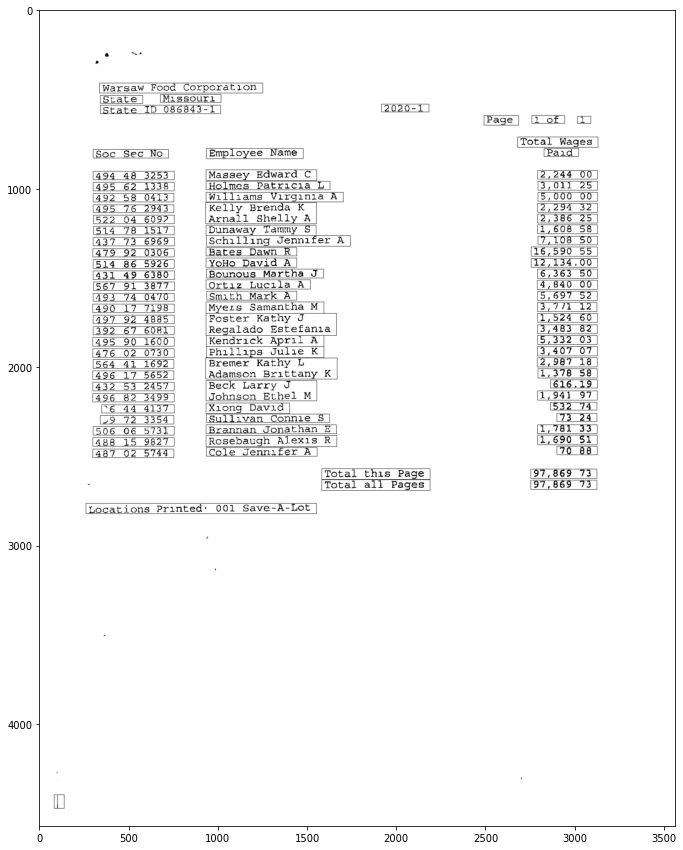

0                1   2
0                                       
 Missouri\n
                     
1                              State ID 086843-1\n
 
                     
2                                             Page\n
            of\n
   

3                                                       Total Wages\n
    
4                      Soc Sec No\n
 Employee Name\n
          Paid\n
    
5                   494 48 3253\n
 Massey Edward C\n
      2,244 00\n
    
6                 495 62 1338\n
 Holmes Patricia L\n
      3,011 25\n
    
7               492 58 0413\n
 Williams Virginia A\n
      5,000 00\n
    
8                
 Kelly Brenda K\nArnall Shelly A\n
      2;294 32\n
    
9                                      522 04 609?\n
      2,386 25\n
    
10                  514 78 1517\n
 Dunaway Tammy S\n
      1,608 58\n
    
11             437 73 6969\n
 Schilling Jennifer A\n
      7,108 50\n
    
12                     479 92 0306\n
 Bates Dawn R\n
     26,590 55\n
    
13                     514 86 5926\n
 YoHo David A\n
     12,134.00\n
    
14                 431 49 6380\n
 Bounous Martha J\n
      6,363 50\n
    
15                   S67 91 3877\n
 Ortiz Lucila A\n
      4,840 00\n
    
16                                  
 Smith Mark A\n
      5,697 52\n
    
17                 490 17 7198\n
 Myers Samantha M\n
      3,771 12\n
    
18   497 92 4885\n
 Foster Kathy J\nRegalado Estef...      1,524 60\n
    
19                                     392 67 6081\n
      3,483 82\n
    
20                 495 90 1600\n
 Kendrick April A\n
      5,332 03\n
    
21                 476 02 0730\n
 Phillaps Julie K\n
      3,407 07\n
    
22   564 41 1692\n
 Bremer Kathy L\nAdamson Britta...      2,987 18\n
    
23                                     496 17 5652\n
      1,378 58\n
    
24    432 53 2457\n
 Beck Larry J\nJohnson Ethel M\n
        616.19\n
    
25                                     496 82 3499\n
      1,941 97\n
    
26                       ‘6 44 4137\n
 Xiong David\n
            74\n
    
27                 ~9 72 3354\n
 Sullivan Connie S\n
        73 #24\n
    
28               506 06 5731\n
 Brannan Jonathan E\n
      1,781 33\n
    
29               438 15 9827\n
 Rosebaugh Alexis R\n
      1,690 51\n
    
30                  487 02 5744\n
 Cole Jennifer A\n
         70 88\n
    
31                                 Total this Page\n
     97,869 73\n
    
32                                 Total all Pages\n
     97,869 73\n
    
33               Locations Printed: 001 Save-A-Lot\n

In [4]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04172020/0832337000.jpeg'
table_extraction(file_name)

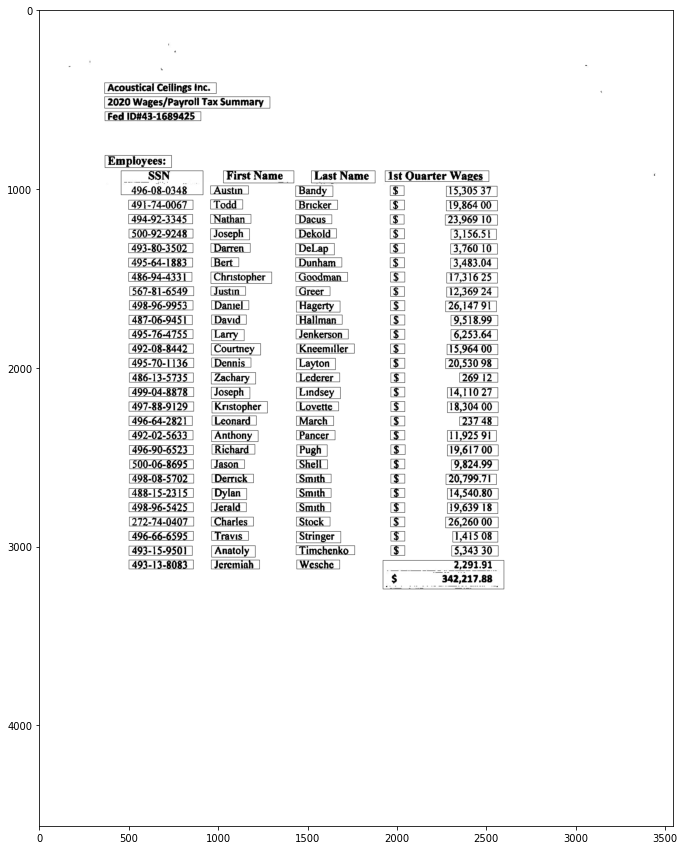

0                1               2  \
0    2020 Wages/Payroll Tax Summary\n
                                    
1                 Fed ID#43-1689425\n
                                    
2                        Employees:\n
                                    
3            soon SSN,\n496-08-0348\n
    First Name\n
    Last Name\n
   
4                                             Austin\n
        Bandy\n
   
5                      491t-74-0067\n
          Todd\n
      Bricker\n
   
6                       494-92-3345\n
        Nathan\n
        Dacus\n
   
7                                    
        Joseph\n
       Dekold\n
   
8                       493-80-3502\n
        Darren\n
        DeLap\n
   
9                       495-64-1883\n
          Bert\n
       Dunham\n
   
10                                   
   Christopher\n
      Goodman\n
   
11                                   
        Justin\n
        Greer\n
   
12                      498-96-9953\n
        Daniel\n
      Hagerty\n
   
13                      487-06-9451\n
         David\n
      Hallman\n
   
14                                   
         Larry\n
    Jenkerson\n
   
15                      492-08-8442\n
      Courtney\n
   Kneemiller\n
   
16                      495-70-1136\n
        Dennis\n
       Layton\n
   
17                      486-13-5735\n
       Zachary\n
      Lederer\n
   
18                                   
        Joseph\n
      Lindsey\n
   
19                     497-88-9 129\n
    Kristopher\n
      Lovette\n
   
20                      496-64-2821\n
       Leonard\n
        March\n
   
21                      492-02-5633\n
       Anthony\n
       Pancer\n
   
22                                   
       Richard\n
         Pugh\n
   
23                                   
         Jason\n
        Sheil\n
   
24                                   
       Derrick\n
        Smith\n
   
25                                   
         Dylan\n
        Smith\n
   
26                                   
        Jerald\n
        Smith\n
   
27                                   
       Charles\n
        Stock\n
   
28                                   
        Travis\n
     Stringer\n
   
29                      493-15-9501\n
       Anatoly\n
    Timchenko\n
   
30                                   
      Jeremiah\n
       Wesche\n
   

                                    3              4  
0                                                     
1                                                     
2                                                     
3                Ist Quarter Wages\n
                 
4                                   
   15,305 37\n
  
5                                   
   19,864 00\n
  
6                                   
   23,969 10\n
  
7                                   
     3,156.5\n
  
8                                   
    3,760 10\n
  
9                                   
    3,483.04\n
  
10                                  
   17,316 25\n
  
11                                  
   12,369 24\n
  
12                                  
   26,147 91\n
  
13                                  
    9,518.99\n
  
14                                  
    6,253.64\n
  
15                                  
   15,964 00\n
  
16                                  
   20,530 98\n
  
17                                  
      269 12\n
  
18                                  
   14,110 27\n
  
19                                  
   18,304 00\n
  
20                                  
      237 48\n
  
21                                  
   11,925 91\n
  
22                                  
   19,617 00\n
  
23                                  
    9,824.99\n
  
24                                  
   20,799.71\n
  
25                                  
   14,540.80\n
  
26                                  
   19,639 18\n
  
27                                  
   26,260 00\n
  
28                                  
    

In [5]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0933091000.jpeg'
table_extraction(file_name)

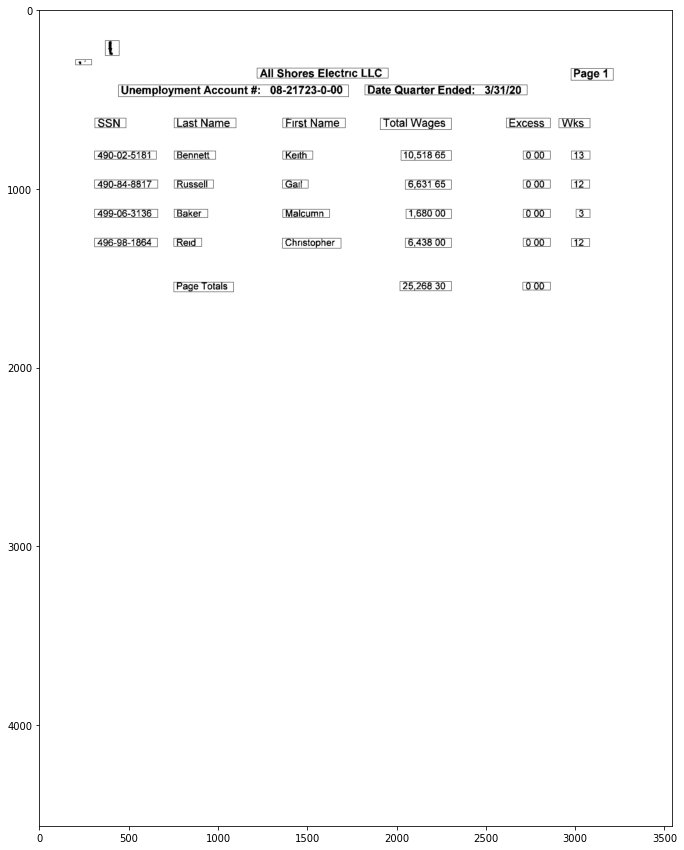

0                                          1  \
0                 
                                              
1                                                                
2                     Unemployment Account #: 08-21723-0-00\n
   
3            SSN\n
                               Last Name\n
   
4   490-02-51871\n
                                 Bennett\n
   
5    490-84-8817\n
                                 Russell\n
   
6    499-06-3136\n
                                   Baker\n
   
7   496-98-1 864\n
                                    Reid\n
   
8                                               Page Totals\n
   

                             2                                3           4  \
0                                                                             
1   All Shores Electric LLC\n
                                                
2                                Date Quarter Ended: 3/31/20\n
               
3                First Name\n
                   Total Wages\n
   Excess\n
   
4                     Keith\n
                     10,518 65\n
      000\n
   
5                      Gall\n
                      6,631 65\n
      000\n
   
6                   Malcumn\n
                      1,680 00\n
     0 00\n
   
7               Christopher\n
                      6,438 00\n
     0 00\n
   
8                                                  25,268 30\n
     0 00\n
   

            5  
0              
1   Page 1\n
  
2              
3      Wks\n
  
4       13\n
  
5       12\n
  
6           
  
7       12\n
  
8

In [2]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0821723000.jpeg'
table_extraction(file_name)

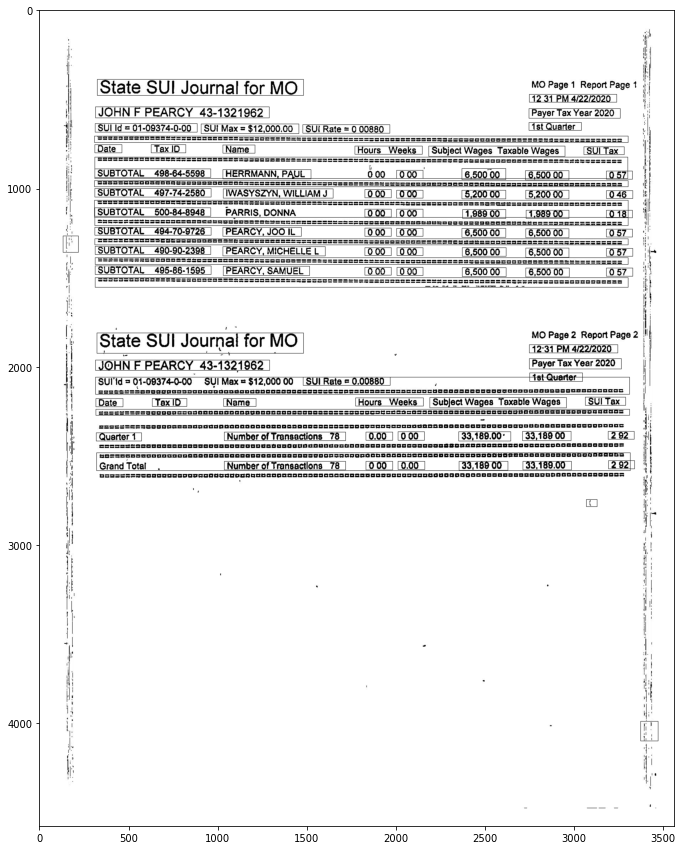

0  \
0                                  
1    JOHN F PEARCY 43-1321962\n
   
2      SUI Id = 01-09374-0-00\n
   
3              Date\n
 Tax JD\n
   
4        SUBTOTAL 498-64-5598\n
   
5        SUBTOTAL 497-74-2580\n
   
6        SUBTOTAL 500-84-8948\n
   
7        SUBTOTAL 494-70-9726\n
   
8                              
   
9        SUBTOTAL 490-90-2398\n
   
10       SUBTOTAL 495-86-1595\n
   
11                                 
12   JOHN F PEARCY 43-1321962\n
   
13                                 
14             Date\n
 Tax ID\n
   
15                  Quarter 1\n
   
16                                 
17                                 

                                                    1                2  \
0                                                                        
1                                                                        
2       SUI Max = $12,000.00\n
 SUi Rate = 0 00880\n
                    
3                                             Name\n
   Hours Weeks\n
   
4                                   HERRMANN, PAUL\n
                    
5                             IWASYSZYN, WILLIAM J\n
           000\n
   
6                                                               000\n
   
7                                   PEARCY, JOO IL\n
           000\n
   
8                                                   
                    
9                               PEARCY, MICHELLE L\n
           000\n
   
10                                  PEARCY, SAMUEL\n
           000\n
   
11                                                                       
12                                                                       
13   SUI'Id = 01-09374-0-00 SUI Max=$12,00000 SUI ...                    
14                                            Name\n
   Hours Weeks\n
   
15                       Number of Transactions 78\n
          0.00\n
   
16                       Number of Traneactlons 78\n
           000\n
   
17                                                                       

           3                                4                        5  \
0                                                                    
   
1                                               Payer Tax Year 2020\n
   
2                                                       1st Quarter\n
   
3              Subject Wages Taxable Wages\n
                            
4     000\n
                      6,500 00\n
              6,500 00\n
   
5    0 00\n
                      §,200 00\n
              5,200 00\n
   
6    0 00\n
                      1,989 00\n
              1,989 00\n
   
7     000\n
                      6,500 00\n
              6,500 00\n
   
8                                                                        
9     000\n
                      6,500 00\n
              6,500 00\n
   
10    000\n
                      6,500 00\n
              6,500 00\n
   
11                                               12'31 PM 4/22/2020\n
   
12                                              Payer Tax Year 2020\n
   
13                                                      tet Quarter\n
   
14             Subject Wages Taxable Wages\n
                            
15    000\n
                    33,189.00:\n
             33,188 00\n
   
16   0,00\n
                     33,188 00\n
             33,189.00\n
   
17                                                                       

              6  
0                
1                
2                
3    SUI Tax\n
  
4       0 57\n
  
5       0 46\n
  
6        018\n
  
7       0 57\n
  
8                
9       0 57\n
  
10      0 57\n
  
11               
12               
13               
14   SUI Tax\n
  
15      2 92\n
  
16      2 92\n
  
17        “~\n

In [3]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04302020/0109374000.jpeg'
table_extraction(file_name)

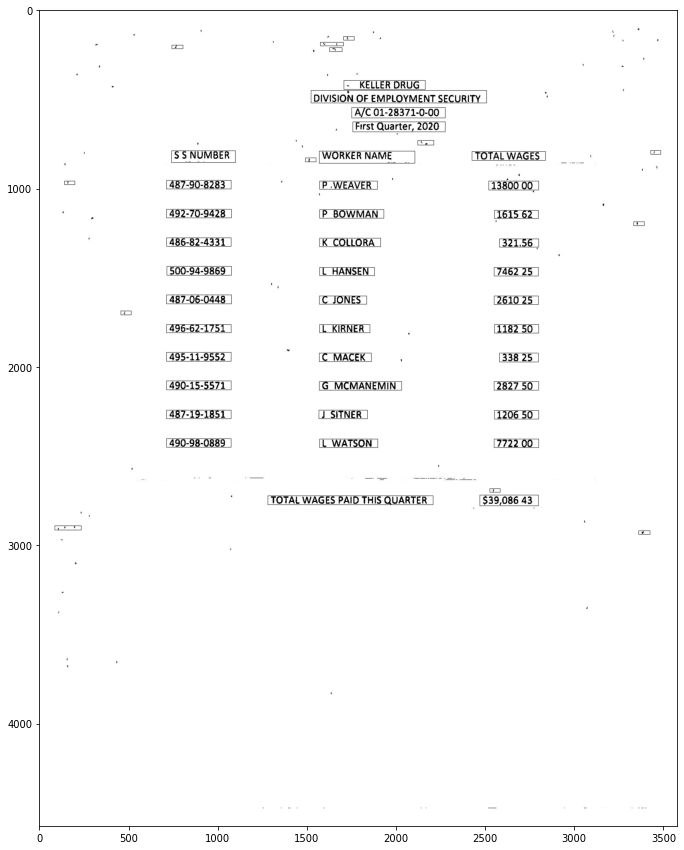

0                                    1                2  \
0                                                        
                    
1                   
                                    
                    
2                                           KELLER DRUG\n
                    
3                       DIVISION OF EMPLOYMENT SECURITY\n
                    
4                                     A/C 01-28371-0-00\n
                    
5                                   First Quarter, 2020\n
                    
6                                                        
                    
7        SS NUMBER\n
                      WORKER NAME_\n
   TOTAL WAGES\n
   
8                                                        
                    
9    
 487-90-8283\n
                         P .WEAVER\n
                
   
10     492-70-9428\n
                          P BOWMAN\n
       1615 62\n
   
11                                                                            
12     486-82-4331\n
                         K COLLORA\n
        321.56\n
   
13     500-94-9869\n
                          L HANSEN\n
       7462 25\n
   
14     487-06-0448\n
                           C JONES\n
       2610 25\n
   
15                  
                                                         
16     496-62-1751\n
                          L KIRNER\n
       1182 50\n
   
17     495-11-9552\n
                           C MACEK\n
        338 25\n
   
18                  
                       G MCMANEMIN\n
       2827 50\n
   
19     487-19-1851\n
                          J SITNER\n
       1206 50\n
   
20     490-98-0889\n
                          L WATSON\n
       7722 00\n
   
21                                                                        
   
22                        TOTAL WAGES PAID THIS QUARTER\n
    $39,086 43\n
   
23                  
                                                         

     3  
0       
1       
2       
3       
4       
5       
6       
7    
  
8       
9       
10      
11   
  
12      
13      
14      
15      
16      
17      
18      
19      
20      
21      
22      
23

In [4]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04302020/0128371000.jpeg'
table_extraction(file_name)

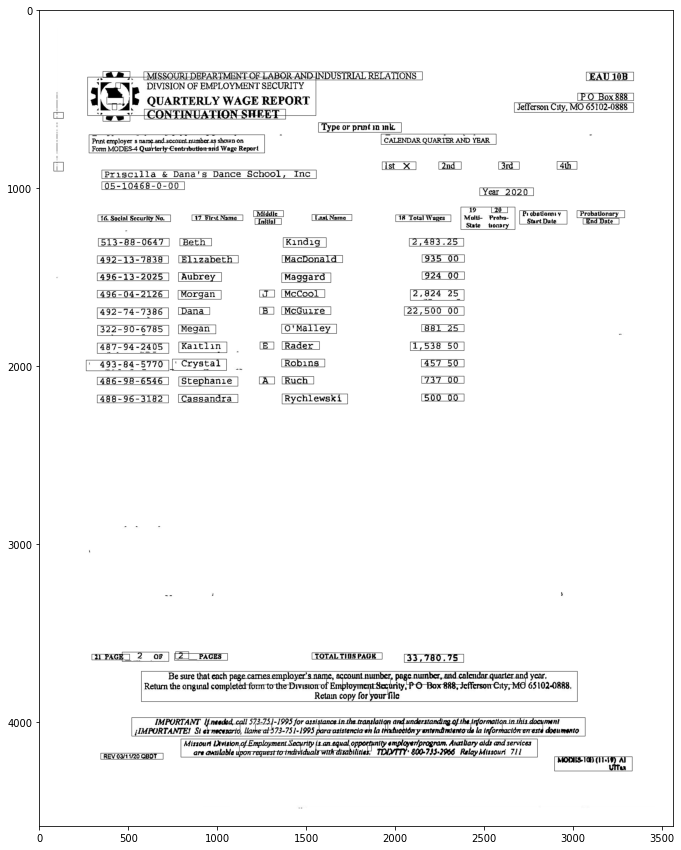

0   \
0                                                   
   
1    PARRY A A A AE ek ee ee\n\nDIVISION OF EMPLOY...   
2                                                   
   
3                                                   
   
4                                                   
   
5                                                 
 
   
6                                                       
7    Print employer s name and account number as s...   
8                                                 \n
   
9                                                   
   
10            Priscilla & Dana's Dance School, Inc\n
   
11                                   05-10468-0-00\n
   
12                                                      
13                         16. Social Securlty No.\n
   
14                                     513-88-0647\n
   
15                                     492-13-7838\n
   
16                                     496-13-2025\n
   
17                                     496-04-2126\n
   
18                                     492-74-7386\n
   
19                                     322-90-6785\n
   
20                                     487-94-2405\n
   
21                                 ' 493-84-5770 |\n
   
22                                     486-98-6546\n
   
23                                     488-96-3182\n
   
24                                   21 PAGE\n
 or\n
   
25                                                      
26                                                      
27                                                      
28                                                      
29                                                      
30                                                      
31                               REV 03/11/20 QBOT\n
   

                                                   1   \
0    MISSOURI DEPARTMENT OF LABOR AND INDUSTRIAL R...   
1                                                       
2                                                       
3                                                       
4                                                       
5                                                   
   
6                                                       
7                                                       
8                                                       
9                                                       
10                                                      
11                                                      
12                                                      
13                                   17 First Name\n
   
14                                            Beth\n
   
15                                       Elizabeth\n
   
16                                          Aubrey\n
   
17                                          Morgan\n
   
18                                            Dana\n
   
19                                           Megan\n
   
20                                         Kaitlin\n
   
21                                        ‘Crystal\n
   
22                                       Stephanie\n
   
23                                       Cassandra\n
   
24                                    2 __ PAGES\n
 
   
25                                                      
26                                                      
27                                                      
28                                                \n
   
29                                                      
30                                                      
31                                                      

                                                   2   \
0                                                       
1                                                       
2                                                       
3                                                       
4 

In [5]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04302020/0510468000.jpeg'
table_extraction(file_name)

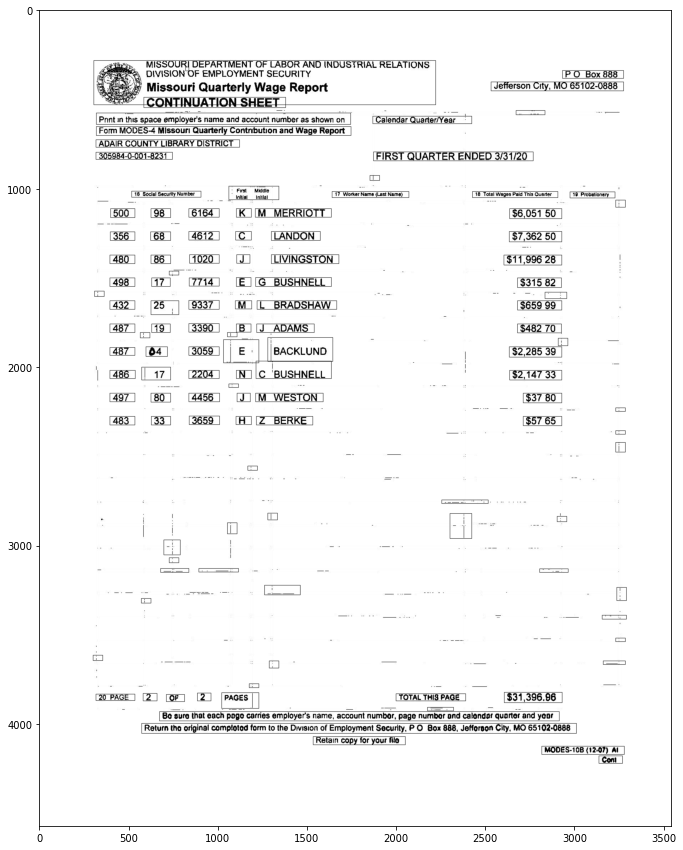

0  \
0                                       
1                                       
2                                       
3                                       
4                                       
5                                       
6                                       
7    ADAIR COUNTY LIBRARY DISTRICT\n
   
8                305984-0-001-8231\n
   
9                                       
10                                      
11                                      
12                                      
13                             500\n
   
14                             356\n
   
15                             480\n
   
16                                      
17                             498\n
   
18                                  
   
19                             432\n
   
20                             487\n
   
21                                      
22                                      
23                             487\n
   
24                                      
25                                      
26                             486\n
   
27                                      
28                             497\n
   
29                                      
30                             483\n
   
31                                      
32                                      
33                                      
34                                      
35                                      
36                                      
37                                      
38                                      
39                                      
40                                      
41                                      
42                                      
43                                      
44                                      
45                                  
   
46                                      
47                                      
48                         20 PAGE\n
   
49                                      
50                                      

                                                    1                       2  \
0                                                                           
   
1                                                                               
2                                                                               
3                                                       CONTINUATION SHEET\n
   
4    Print in this space employer's name and accou...                           
5                                                                               
6    Form MODES-4 Missouri Quarterly Contribution ...                           
7                                                                               
8                                                                               
9                                                                               
10                                                                              
11                       18 Soclal Security Number\n
                           
12                                                                              
13                                              98\n
                           
14                                              68\n
                           
15                                              86\n
                           
16                                                                          
   
17                                              17\n
                           
18                                                                              
19                                            25 |\n
                           
20                                              19\n
                           
21                                                  
                           
22                                      

In [6]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04302020/0518949000.jpeg'
table_extraction(file_name)

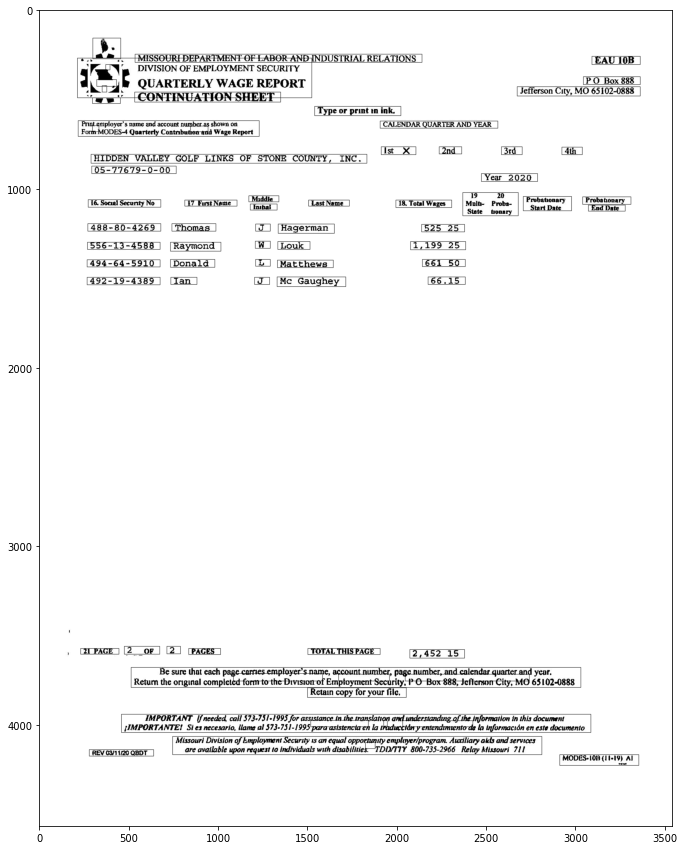

0  \
0    a\n\n \n\nwh 2d,\n\nLVELLIAILI WEN EARS) SRTR...   
1                                                   
   
2                                                 \n
   
3                                                       
4                                                   
   
5                                                       
6    Pnat employer's name and account number as sh...   
7                                                   
   
8                                                       
9    HIDDEN VALLEY GOLF LINKS OF STONE COUNTY, INC...   
10                                   05-77679-0-00\n
   
11                                                      
12                          16. Social Security No\n
   
13                                     488-80-4269\n
   
14                                     556-13-4588\n
   
15                                     494-64-5910\n
   
16                                     492-19-4389\n
   
17                                   Z1 PAGE\n
 OF\n
   
18                                                      
19                                                      
20                                                      
21                                                      
22                                                      
23                                                      
24                               REV 03/11/20 QHDT\n
   

                                                    1  \
0    MISSOURI DEPARTMENT OF LABOR AND INDUSTRIAL R...   
1                                                       
2                                                       
3                               CONTINUATION SHEET\n
   
4                                                       
5                                                       
6                                                       
7                                                   
   
8                                                       
9                                                       
10                                                      
11                                                      
12                                   17 First Name\n
   
13                                          Thomas\n
   
14                                         Raymond\n
   
15                                          Donald\n
   
16                                             Tan\n
   
17                                         
 PAGES\n
   
18                                                      
19                                                      
20                                                      
21                                                      
22                                                      
23                                                      
24                                                      

                                                    2  3  \
0                                                          
1                                                          
2                                                          
3                                                          
4                                                          
5                                                          
6                                                          
7                                                          
8                                                          
9                                                          
10                                                         
11                                                         
12                               Middle\n
 Initial\n
      
13                                      
 Ragerman\n
      
14                                          
 Louk\n
      
15                                      
 Matthews\n
      
16                                    
 Mc Gaughey\n
      
17    

In [2]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04302020/0577679000.jpeg'
table_extraction(file_name)

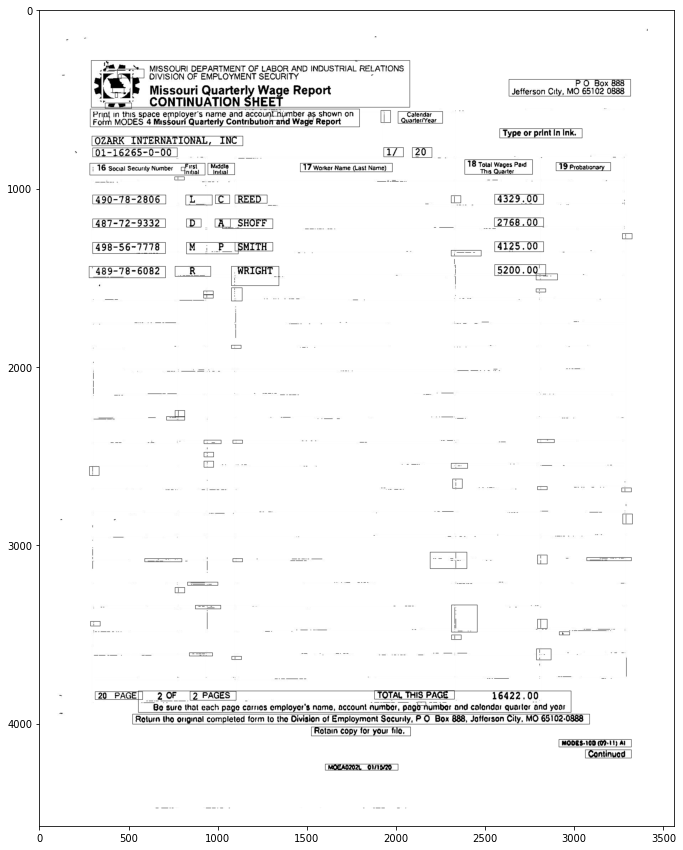

0            1  \
0                                                   
                
1                                                   
                
2                                                                    
3                                                   
                
4                                                   
                
5                                                   
                
6    Print in this space employer's name and accou...                
7                                                   
            
   
8                                                                    
9                         OZARK INTERNATIONAL, INC\n
                
10                                   01-16265-0-00\n
                
11                                                                   
12    ; First\n| 16 Social Security Number trateai\n
                
13                                                               
   
14                                                               
   
15                                     490-78-2806\n
            
   
16                                     487-72-9332\n
            
   
17                                                                   
18                                    498-56~-7778\n
            
   
19                                                                   
20                                     489-78-6082\n
            
   
21                                                                   
22                                                               
   
23                                                               
   
24                                                                   
25                                                               
   
26                                                               
   
27                                                               
   
28                                                               
   
29                                                               
   
30                                                  
                
31                                                                   
32                                                                   
33                                                                   
34                                                                   
35                                                                   
36                                                  
                
37                                                               
   
38                                                               
   
39                                                               
   
40                                                  
                
41                                                                   
42                                                                   
43                                                                   
44                                                               
   
45                                                                   
46                                         20 PAGE\n
   2 PAGES\n
   
47                                                                   
48                                                                   
49                                                                   

                      2                                                  3  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            
5            

In [3]:
file_name = '/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0116265000.jpeg'
table_extraction(file_name)

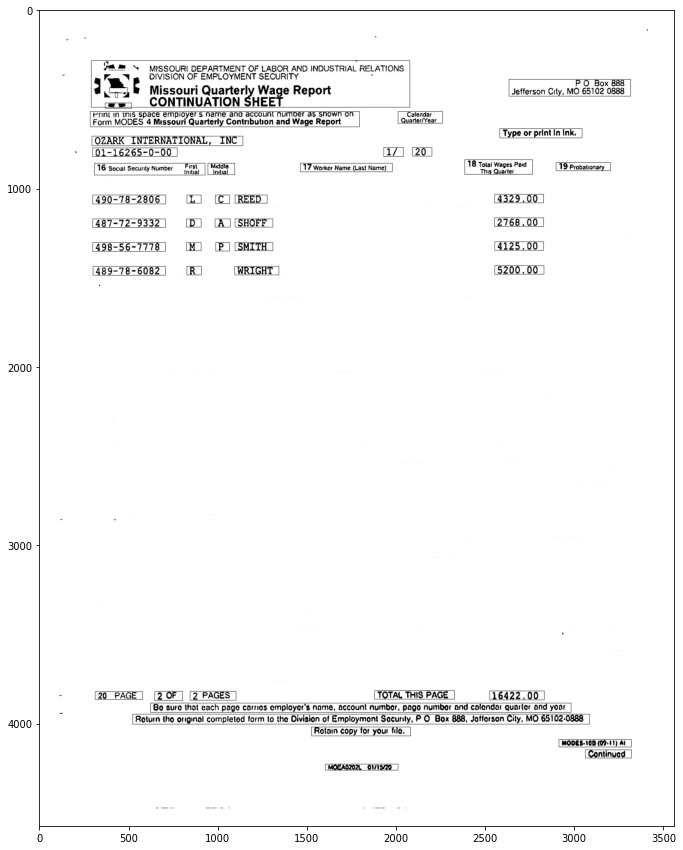

0  \
0                                                       
1                                                   
   
2                                              foo\n
   
3                                                   
   
4    rrint In Inis space employer's name ana accou...   
5                                                       
6                         OZARK INTERNATIONAL, INC\n
   
7                                    01-16265-0-00\n
   
8         First\n16 Social Security Number lrateai\n
   
9                                      490-78-2806\n
   
10                                     487-72-9332\n
   
11                                     498-56-7778\n
   
12                                     489-78-6082\n
   
13                                 20 PAGE\n
 2 OF\n
   
14                                                      
15                                                      
16                                                      
17                                                      

                                                    1  \
0                                                       
1                                                       
2                                                       
3                                                       
4                                                       
5                                                       
6                                                       
7                                                       
8                                  Middte\nInitial\n
   
9                                         
 
 REED\n
   
10                                       
 
 SHOFF\n
   
11                                       
 
 SMITH\n
   
12                                        
 WRIGHT\n
   
13                                         2 PAGES\n
   
14   Bo sure that each page carnes employer's name...   
15                                                      
16                                                      
17                                                      

                                 2  \
0                                    
1                                    
2                                    
3                                    
4        Calendar\nQuarter/Year\n
   
5                                    
6                                    
7                      1/\n
 20\n
   
8    17 Worker Name (Last Name)\n
   
9                                    
10                                   
11                                   
12                                   
13              TOTAL THIS PAGE\n
   
14                                   
15   Rotain copy for your fila,\n
   
16                                   
17                                   

                                                3                         4  
0    PO Box 888\nJefferson City, MO 65102 0888\n
                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            
5                        Type or print In Ink.\n
                            
6                                                                            
7                                                                            
8            18 Total Wages Paid\nThis Quarter\n
        19 Probationary\n
  
9                                      4329.00\n
                            
10                                     2768.00\n
                            
11                                     4125.00\n
                            
12                                     5200.00\n
                            
13                                    16422.00\n
                    

In [11]:
file_name = 'borderless.jpeg'
table_extraction(file_name)

True

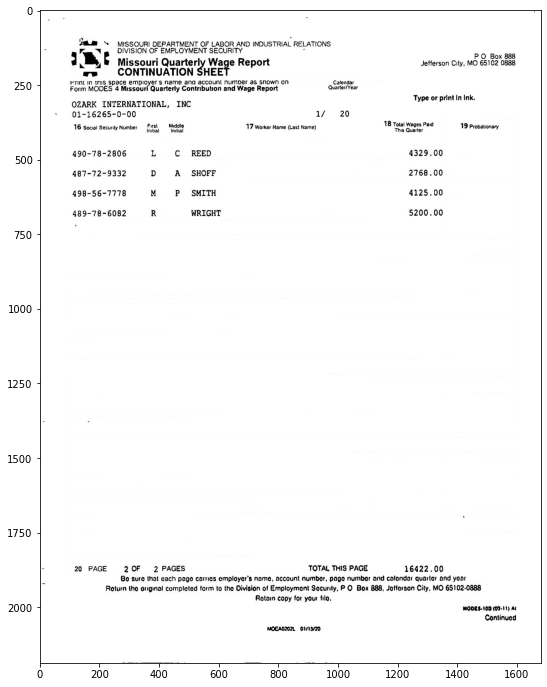

In [8]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04242020/0116265000.jpeg')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
plt.figure(figsize=(12,12))
plt.imshow(result)
cv2.imwrite('borderless.jpeg',result)

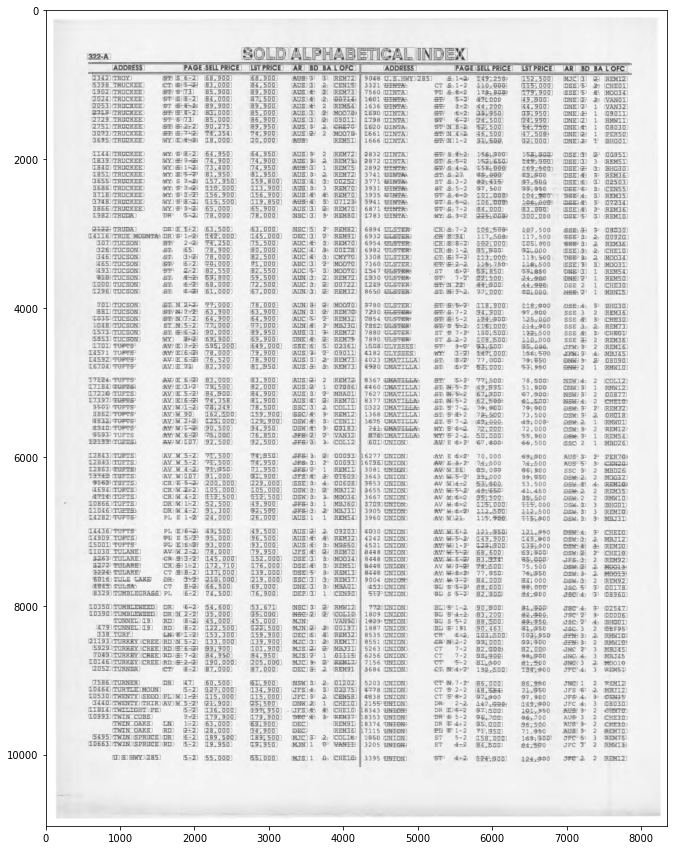

0  1           2   3     4   5   6   7   8        9   ... 33      34 35  \
0                                                          ...                 
1     
                                                    ...                 
2                                                          ...                 
3     
                                    
               ...                 
4                    
                     
               ...                 
..   .. ..         ...  ..   ...  ..  ..  ..  ..      ...  ... ..     ... ..   
103                
 
         
       
       
           ...                 
104                
 
         
   
   
       
           ...                 
105   
            
 
   
   
 
       
       
   Lad\n
  ...      on\n
      
106   
      TWIN\n
 
   
   
 
       
       
           ...                 
107                
 
   
     
       
       
           ...          
      

       36 37  38 39  40                 41  42  
0                                               
1                                               
2                                               
3                                               
4       
             
                         
..    ... ..  .. ..  ..                ...  ..  
103     
      
          CME 4\n
 Aamo\n
      
104   
 
      
                       
 
      
105     
      
                         
      
106            
                         
   
  
107   
 
      
                         
      

[108 rows x 43 columns]

In [2]:
file_name = '/home/vimalkumar.s/Documents/table splitting/page_5/pg_5.jpeg'
table_extraction(file_name)

NameError: name 'dataframe' is not defined

In [6]:
    
def table_extraction(file_name):   
    import cv2
    import numpy as np 
    import pandas as pd
    import pytesseract
    import matplotlib.pyplot as plt
    import statistics
    from PIL import Image

    plt.rcParams['figure.figsize'] = [15, 15]

    img = cv2.imread(file_name,0)
    img.shape



    #imgplot = plt.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])
    img123 = img1.copy()

    (thresh, th3) = cv2.threshold(img1, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

    #imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    th3 = 255-th3

    #imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    if(th3.shape[0]<1000):
        ver = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1]])
        hor = np.array([[1,1,1,1,1,1]])

    else:
        ver = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1],
                   [1]])
        hor = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

    img_temp1 = cv2.erode(th3, ver, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)


    #imgplot = plt.imshow(cv2.resize(verticle_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()


    # to detect horizontal lines of table borders
    img_hor = cv2.erode(th3, hor, iterations=3)
    hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)


    #imgplot = plt.imshow(cv2.resize(hor_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

    #imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    hor_ver = 255-hor_ver

    #imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    temp = cv2.subtract(th3,hor_ver)

    #imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    temp = 255-temp


    #imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    tt = cv2.bitwise_xor(img1,temp)

    #imgplot = plt.imshow(cv2.resize(tt, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    iii = cv2.bitwise_not(tt)


    #imgplot = plt.imshow(cv2.resize(iii, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    tt1=iii.copy()


    #imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    #kernel initialization
    ver1 = np.array([[1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1],
                   [1,1]])

    hor1 = np.array([[1,1,1,1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1,1,1,1]])

    temp1 = cv2.erode(tt1, ver1, iterations=1)
    verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=1)

    #imgplot = plt.imshow(cv2.resize(verticle_lines_img1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    temp12 = cv2.erode(tt1, hor1, iterations=1)
    hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=1)

    #imgplot = plt.imshow(cv2.resize(hor_lines_img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)

    #imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    dim1 = (hor_ver.shape[1],hor_ver.shape[0])

    dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)
    resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

    want = cv2.bitwise_not(resized)
    #imgplot = plt.imshow(cv2.resize(want, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    if(want.shape[0]<1000):
        kernel1 = np.array([[1,1,1]])
        kernel2 = np.array([[1,1],
                            [1,1]])
        kernel3 = np.array([[1,0,1],[0,1,0],
                           [1,0,1]])
    else:
        kernel1 = np.array([[1,1,1,1,1,1]])
        kernel2 = np.array([[1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1]])

    tt1 = cv2.dilate(want,kernel1,iterations=14)
    #imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    #plt.show()

    resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

    contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    def sort_contours(cnts, method="left-to-right"):
        # initialize the reverse flag and sort index
        reverse = False
        i = 0

        # handle if we need to sort in reverse
        if method == "right-to-left" or method == "bottom-to-top":
            reverse = True

        # handle if we are sorting against the y-coordinate rather than
        # the x-coordinate of the bounding box
        if method == "top-to-bottom" or method == "bottom-to-top":
            i = 1

        # construct the list of bounding boxes and sort them from top to
        # bottom
        boundingBoxes = [cv2.boundingRect(c) for c in cnts]
        (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
            key=lambda b:b[1][i], reverse=reverse))

        # return the list of sorted contours and bounding boxes
        return (cnts, boundingBoxes)

    (cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

    heightlist=[]
    for i in range(len(boundingBoxes)):
        heightlist.append(boundingBoxes[i][3])

    heightlist.sort()

    sportion = int(.5*len(heightlist))

    eportion = int(0.05*len(heightlist))

    #taking 50% to 95% values of heights and calculate their mean 
    #this will neglect small bounding box which are basically noise 
    try:
        medianheight = statistics.mean(heightlist[-sportion:-eportion])
    except:
        medianheight = statistics.mean(heightlist[-sportion:-2])

    box =[]
    imag = iii.copy()
    for i in range(len(cnts)):    
        cnt = cnts[i]
        x,y,w,h = cv2.boundingRect(cnt)
        if(h>=.5*medianheight and w/h > 0.98):
            image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
            box.append([x,y,w,h])
        # to show image


    imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
    plt.show()
    #cv2.imwrite('imagegen.jpg',image)

    main=[]
    j=0
    l=[]
    for i in range(len(box)):    
        if(i==0):
            l.append(box[i])
            last=box[i]
        else:
            if(box[i][1]<=last[1]+medianheight/2):
                l.append(box[i])
                last=box[i]
                if(i==len(box)-1):
                    main.append(l)
            else:
    #             print(l)            
                main.append(l)
                l=[]
                last = box[i]
                l.append(box[i])

    #calculating maximum number of box in a particular row
    maxsize=0
    for i in range(len(main)):
        l=len(main[i])
        if(maxsize<=l):
            maxsize=l

    ylist=[]
    for i in range(len(boundingBoxes)):
        ylist.append(boundingBoxes[i][0])

    ymax = max(ylist)
    ymin = min(ylist)

    ymaxwidth=0
    for i in range(len(boundingBoxes)):
        if(boundingBoxes[i][0]==ymax):
            ymaxwidth=boundingBoxes[i][2]

    TotWidth = ymax+ymaxwidth-ymin

    width = []
    widthsum=0
    for i in range(len(main)):
        for j in range(len(main[i])):
            widthsum = main[i][j][2]+widthsum

    #     print(" Row ",i,"total width",widthsum)
        width.append(widthsum)
        widthsum=0

    main1=[]
    flag=0
    for i in range(len(main)):
        if(i==0):
            if(width[i]>=(.8*TotWidth) and len(main[i])==1 or width[i]>=(.8*TotWidth) and width[i+1]>=(.8*TotWidth) or len(main[i])==1):
                flag = 1
        else:
            if(len(main[i])==1 and width[i-1]>=.8*TotWidth):
                flag=1

            elif(width[i]>=(.8*TotWidth) and len(main[i])==1):
                 flag=1

            elif(len(main[i-1])==1 and len(main[i])==1 and (width[i]>=(.7*TotWidth) or width[i-1]>=(.8*TotWidth))):
                flag=1


        if(flag==1):
            pass
        else:
            main1.append(main[i])

        flag=0

    maxsize1=0
    for i in range(len(main1)):
        l=len(main1[i])
        if(maxsize1<=l):
            maxsize1=l

    midpoint=[]
    for i in range(len(main1)):
        if(len(main1[i])==maxsize1):
    #         print(main1[i])
            for j in range(maxsize1):
                midpoint.append(int(main1[i][j][0]+main1[i][j][2]/2))
            break

    midpoint=np.array(midpoint)
    midpoint.sort()

    final = [[]*maxsize1]*len(main1)

    for i in range(len(main1)):
        for j in range(len(main1[i])):
            min_idx = j        
            for k in range(j+1,len(main1[i])):
                if(main1[i][min_idx][0]>main1[i][k][0]):
                    min_idx = k

            main1[i][j], main1[i][min_idx] = main1[i][min_idx],main1[i][j]

    finallist = []
    for i in range(len(main1)):
        lis=[ [] for k in range(maxsize1)]
        for j in range(len(main1[i])):
    #         diff=np.zeros[maxsize]
            diff = abs(midpoint-(main1[i][j][0]+main1[i][j][2]/4))
            minvalue = min(diff)
            ind = list(diff).index(minvalue)
    #         print(minvalue)
            lis[ind].append(main1[i][j])
    #     print('----------------------------------------------')
        finallist.append(lis)

    todump=[]
    for i in range(len(finallist)):
        for j in range(len(finallist[i])):
            to_out=''
            if(len(finallist[i][j])==0):
                #print('-')
                todump.append(' ')

            else:
                for k in range(len(finallist[i][j])):                
                    y,x,w,h = finallist[i][j][k][0],finallist[i][j][k][1],finallist[i][j][k][2],finallist[i][j][k][3]

                    roi = iii[x:x+h, y+2:y+w]
                    roi1= cv2.copyMakeBorder(roi,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255])
                    img = cv2.resize(roi1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                    kernel = np.ones((2, 1), np.uint8)
                    img = cv2.dilate(img, kernel, iterations=1)
                    img = cv2.erode(img, kernel, iterations=2)
                    img = cv2.dilate(img, kernel, iterations=1)



                    out = pytesseract.image_to_string(img)
                    if(len(out)==0):
                        out = pytesseract.image_to_string(img,config='-psm 6')

                    to_out = to_out +" "+out

                #print(to_out)

                todump.append(to_out)
    #             cv2.imshow('image',img)
    #             cv2.waitKey(0)
    #             cv2.destroyAllWindows()





        #print("--------------------------------------------------")

    npdump = np.array(todump)

    dataframe = pd.DataFrame(npdump.reshape(len(main1),maxsize1))
    ex = dataframe.to_csv('/home/vimalkumar/Downloads/file.csv')

    display(dataframe)
    

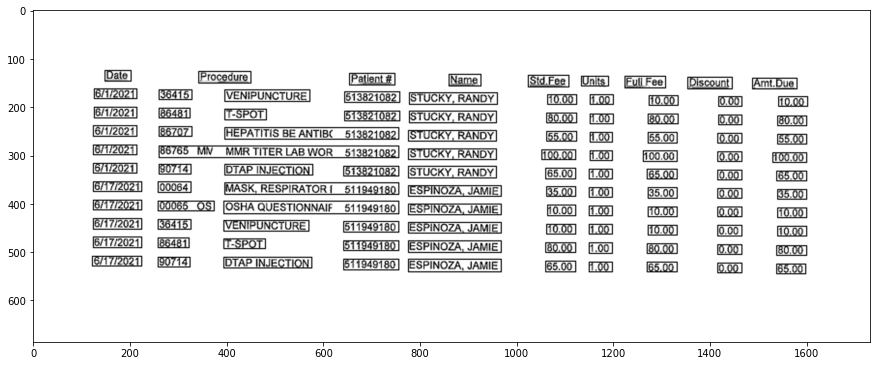

0                                      1  \
0         Date\n
                           Procedure\n
   
1     6/1/2021\n
                               36415\n
   
2     6/1/2021\n
                               86481\n
   
3     6/1/2021\n
                               86707\n
   
4     6/1/2021\n
   86765 MN MMRTITERLABWOR 513821082\n
   
5     6/1/2021\n
                               90714\n
   
6    6/17/2021\n
                               00064\n
   
7    6/17/2021\n
                            vo065 OS\n
   
8    6/17/2021\n
                               36415\n
   
9    6/17/2021\n
                               86481\n
   
10   6/17/2021\n
                               90714\n
   

                                    2              3                    4  \
0                                       Patient #\n
                    
   
1                     VENIPUNCTURE\n
   513821082\n
     STUCKY, RANDY\n
   
2                           T-SPOT\n
   513821082\n
     STUCKY, RANDY\n
   
3    HEPATITIS BE ANTIBC 513821082\n
                    STUCKY, RANDY\n
   
4                                                        STUCKY, RANDY\n
   
5                   DTAP INJECTION\n
   513821082\n
     STUCKY, RANDY\n
   
6      MASK, RESPIRATOR! 511949180\n
                  ESPINOZA, JAMIE\n
   
7      OSHA QUESTIONNAIF 511949180\n
                  ESPINOZA, JAMIE\n
   
8                     VENIPUNCTURE\n
   511949180\n
   ESPINOZA, JAMIE\n
   
9                           T-SPOT\n
   511949180\n
   ESPINOZA, JAMIE\n
   
10                  DTAP INJECTION\n
   511949180\n
   ESPINOZA, JAMIE\n
   

             5          6             7         8           9  
0            
   Units\n
   Eull Fee\n
         
           
  
1     10,00\n
    1.00\n
      10,00\n
   0.00\n
    10.00\n
  
2     80,00\n
    1.00\n
             
   0,00\n
           
  
3     55.00\n
    1.00\n
      65.00\n
   0.00\n
    55.00\n
  
4    100.00\n
    1.00\n
             
   0.00\n
   100.00\n
  
5     65.00\n
    1.00\n
      65.00\n
   0.00\n
    65.00\n
  
6     35.00\n
    7.00\n
      35.00\n
   9.00\n
    35.00\n
  
7     10.00\n
    1.00\n
      10.00\n
   0.00\n
    10.00\n
  
8     10.00\n
    1,00\n
      10.00\n
   0.00\n
    10.00\n
  
9     80,00\n
    1.00\n
             
   0.00\n
    80.00\n
  
10    65.00\n
    1,00\n
      65.00\n
   0,00\n
    65.00\n

In [7]:
file_name = '/home/vimalkumar/Pictures/im3.png'
table_extraction(file_name)